Τελική Εργασία
ΕΔΔΕ2 "Ανάλυση Μεγάλων Δεδομένων μέσω της Γλώσσας Python"
Στo πλαίσιo της τελικής εργασίας σας, ζητείται να αναλύσετε ένα μεγάλο αριθμό δεδομένων
(N>500) τα οποία αναφέρονται σε ένα ελληνικό θέμα και συγκεκριμένα στην ελληνική
ειδησεογραφία με θέμα την Covid-19, με το σύνολο (ή ένα μέρος) των δεδομένων να έχουν
εξορυχθεί από το διαδίκτυο με τεχνικές scraping (Beautiful Soup). Μπορείτε επίσης να
συγκεντρώσετε για την ίδια χρονική περίοδο tweets (και με χρήση workbench). Για την ανάλυση
των δεδομένων σας θα πρέπει να κάνετε τα παρακάτω βήματα επεξεργασίας:
1. Να εξορύξετε τα δεδομένα σας με χρήση των παραπάνω τεχνικών.
2. Τα δεδομένα θα πρέπει να εισαχθούν στην Python σε μορφή dataframe
3. Να κάνετε καθαρισμό των δεδομένων από άχρηστα στοιχεία, NaN values, περιττά κείμενα
και επιπλέον στήλες.
4. Αν απαιτείται, μπορείτε να τα επεξεργαστείτε κατάλληλα (αφαίρεση stopwords,
stemming/lemmatization)
5. Να δημιουργήσετε νέες παραμέτρους ως στήλες στο dataframe όπως o μήνας, ο χρόνος,
ένα ποσοστό κ.λπ.
6. Να πραγματοποιήσετε αναλύσεις στα αριθμητικά δεδομένα σας και να δημιουργήσετε τα
αντίστοιχα γραφήματα, τα οποία δείχνουν χαρακτηριστικά και συσχετίσεις που κρύβουν τα
δεδομένα σας.
7. Μπορείτε να δημιουργήσετε διάφορα γραφήματα από τα κείμενά σας όπως (α) ένα
wordcloud, (β) ένα διάγραμμα με τις 15 πιο συχνές λέξεις και (γ) ένα διάγραμμα με τα πιο
συχνά διγράμματα (bigrams).
8. Χρησιμοποιήστε το πεδίο της ημερομηνίας ως index στο dataframe που θα δημιουργήσετε
ώστε να αξιοποιήσετε τις λειτουργίες της χρονοσειράς (resample()).
9. Κάνοντας χρήση του ελληνικού λεξικού για sentiment anaysis του NRC βρείτε την
πολικότητα (θετική - αρνητική) και τα συναισθήματα των κειμένων σας, και αποθηκεύστε τα
σε νέες στήλες στο dataframe των δεδομένων σας.
10. Δημιουργήστε γραφήματα ομαδοποιώντας μέσω του resample() την πολικότητα των
άρθρων σας ανά ημέρα/μήνα/3μηνο/έτος ανάλογα με το θέμα.
11. Αξιοποιήστε την διανυσματοποίηση των κειμένων σας (CountVectorizer()), και τη χρήση της
ομοιότητας κειμένων μέσω της συνάρτησης cosine_similarity() ώστε να βρείτε άρθρα που
έχουν μεγάλη ομοιότητα. Παρουσιάστε τη συσχέτιση αυτή μέσω γραφήματος τύπου
heatmap.
12. Ανεβάστε τα γραφήματα που κατασκευάσατε στο site: http://helios.media.uoa.gr/datajour/
φτιάχνοντας μια ιστορία (τουλάχιστον 800 λέξεις), αναφέροντας το όνομά σας. Βελτιώστε
όπου είναι δυνατόν την ποιότητα των γραφημάτων μέσω προγραμμάτων όπως το flourish,
datawrapper κ.λπ.
13. Ο κώδικάς σας μαζί με τα δεδομένα θα ανέβει στον προσωπικό σας λογαριασμό στο github
(αν τα δεδομένα υπερβαίνουν το όριο, βάλτε απλά ένα δείγμα ώστε να τρέχει ο κώδικας).
14. Το άρθρο σας σε μορφή pdf με τίτλο Eponimo_teliki_ergasia.zip μαζί με το link για τον
κώδικα (github) θα ανέβει στο eclass.
Η εργασία έχει τελική ημερομηνία παράδοσης: 7/7/2021

# Protothema scraping

In [ ]:
!pip install selenium
!apt-get update 
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',chrome_options=chrome_options)

In [ ]:
import time
from bs4 import BeautifulSoup
driver.implicitly_wait(30)

In [ ]:
try:
    SCROLL_PAUSE_TIME = 5.5
    driver.get("https://www.protothema.gr/anazitisi/?q=%CF%80%CF%85%CF%81%CE%BA%CE%B1%CE%B3%CE%B9%CE%AD%CF%82")


    last_height = driver.execute_script("return document.body.scrollHeight")

    while (last_height < 170000):
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        time.sleep(SCROLL_PAUSE_TIME)
        new_height = driver.execute_script("return document.body.scrollHeight")
        print('height:', new_height)
        if new_height == last_height:
            print('height =' , new_height)
            break
        last_height = new_height
finally:
#    driver.quit()
    print("OK")

In [ ]:
soup = BeautifulSoup(driver.page_source, "html.parser")

In [ ]:
stories_list = []

stories = soup.find_all('div', { 'class': 'article' })

for story in stories:
    heading = story.find('h3')
    link = heading.find('a')
    date = story.find('time')
    datetime = date['datetime']

    
    story_dict = {
        'headline': heading.text,
        'url': link['href'],
        'date': datetime
    }
     
    stories_list.append(story_dict)

In [ ]:
print(len(stories_list))

In [ ]:
import pandas as pd
df = pd.DataFrame(stories_list)

In [ ]:
df

In [ ]:
df.sort_values(by='date', ascending = False)

headline  ...                       date
0    \nΧρυσοχοΐδης: Ισχυρές δυνάμεις στην περιοχή τ...  ...  2021-08-20T20:38:00+03:00
1    \nΕπικοινωνία Μητσοτάκη - Ερντογάν: Συμφωνία ν...  ...  2021-08-20T20:37:00+03:00
2     \nΠυρκαγιές: Εκδηλώθηκαν 41 το τελευταίο 24ωρο\n  ...  2021-08-20T19:48:00+03:00
3    \nΤράπεζες: Νέες ρυθμίσεις με στόχο να μείνουν...  ...  2021-08-20T16:40:00+03:00
4    \nΑποζημιώσεις πυρόπληκτων: Καταβλήθηκαν πάνω ...  ...  2021-08-20T16:37:00+03:00
..                                                 ...  ...                        ...
785  \nΗ Ελλάδα σε πύρινο κλοιό: Δύσκολες ώρες για ...  ...  2021-08-07T07:01:07+03:00
786      \nΗ φύση μάς εκδικείται, γιατί τη βιάζουμε!\n  ...  2021-08-07T06:46:52+03:00
787  \nΜαίνεται η πύρινη λαίλαπα: Nυχθημερόν μάχη μ...  ...  2021-08-07T06:35:00+03:00
788                     \nΠληρώνουμε λάθη δεκαετιών \n  ...  2021-08-07T06:27:12+03:00
789           \nΝέου τύπου φωτιές και παλιά «γιατί» \n  ...  2021-08-07T06:23:08+03:00

[790 rows x 3 columns]

In [ ]:
df.to_csv("protothemafires.csv", index=False)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/protothema_fires.tsv", sep='\t')


In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/protothema_fires.tsv", sep='\t')

In [ ]:
df = pd.read_csv("protothemafires.csv")

In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
pd.set_option('max_rows', None) #viewing all of the data

In [ ]:
df

In [ ]:
from datetime import timedelta
from datetime import datetime as dt

In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df

In [ ]:
df.set_index('date')


In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv("protothemafires.csv")

# Skai scraper

In [ ]:
!pip install beautifulsoup4
!pip install requests

In [ ]:
import requests                            
from bs4 import BeautifulSoup as soup  
import pandas as pd
import matplotlib.pyplot as plt  
% matplotlib inline
import numpy as np

In [ ]:
#siplifying scraper
articles_list= []

for i in range(0,80):

      url = 'https://www.skai.gr/s/%CF%80%CF%85%CF%81%CE%BA%CE%B1%CE%B3%CE%B9%CE%B5%CF%82?page=0' + str(i)
      response = requests.get(url)
      doc = soup(response.text, 'html.parser')
      stories = doc.find_all('div' , {'class': 'cmnArticleTitlePad'})
      for story in stories:
          headline = story.find('a', {'class': 'title mainLink'})
          if headline:
             headline_text = headline.text
          else:
             print("No headline")
          
          summary = story.find('div', {'class': 'lead'})
          if summary:
             summary_text = summary.text
          else:
             print("No summary")

          date = story.find('div', {'class': 'date'})
          if date:
             date_text = date.text
          else:
             print("No date")
                  

          dic = {'Headline': headline_text, 'Summary': summary_text, 'Date': date_text}
          articles_list.append(dic)

In [ ]:
df = pd.DataFrame(articles_list)
df

Headline  ...                Date
0    Μητσοτάκης- Ερντογάν για Αφγανιστάν: Έχουμε κο...  ...  20/08/2021 - 20:42
1    Πυρκαγιές-Αυτοψίες: 408 οι επικίνδυνες κατοικί...  ...  20/08/2021 - 18:23
2    Πυρόπληκτοι: Καταβλήθηκαν οι πρώτες αποζημιώσε...  ...  20/08/2021 - 16:53
3    Ο ρόλος της παιδείας σε μα χώρα που... καίγετα...  ...  20/08/2021 - 13:53
4     Επίσκεψη της ΟΝΝΕΔ και του τομέα Προστασίας τ...  ...  20/08/2021 - 13:49
5    Φωτιά - Βίλια: Καλύτερη η κατάσταση, επιχειρού...  ...  20/08/2021 - 13:37
6    Λέκκας-ΣΚΑΪ για φωτιά στα Βίλια: Η διαφορά σε ...  ...  20/08/2021 - 12:06
7    Φωτιά- Βίλια: Ανησυχία για τις αναζωπυρώσεις -...  ...  20/08/2021 - 10:50
8    Κερατέα: Πυρκαγιά κοντά σε οικιστικό ιστό στο ...  ...  20/08/2021 - 05:21
9    Μητσοτάκης: H πλατφόρμα arogi άνοιξε- Οι πρώτο...  ...  19/08/2021 - 22:44
10   Πυρκαγιές: Ολονύχτιες περιπολίες στρατού και α...  ...  19/08/2021 - 21:42
11   Χρυσοχοΐδης: Οριοθετήθηκε στο μεγαλύτερο μέρος...  ...  19/08/2021 - 21:36
12   Βίντεο-Ντοκουμέντο: Εθελοντές πυροσβέστες περν...  ...  19/08/2021 - 20:26
13   Πυροσβεστική: Νέα ενίσχυση με δυνάμεις από εξω...  ...  19/08/2021 - 18:35
14   Εθνικό Αστεροσκοπείο Αθηνών-meteo.gr: Η “έκρηξ...  ...  19/08/2021 - 18:15
15   Πυρόπληκτοι: Τι χρειάζεται να γνωρίζετε για τη...  ...  19/08/2021 - 17:38
16   Οικονόμου για Αφγανιστάν: Δε γινόμαστε ξέφραγο...  ...  19/08/2021 - 13:37
17   Πυρκαγιές -ΔΕΗ: Διαγραφή οφειλών για όσους έχο...  ...  19/08/2021 - 10:58
18   Πυρκαγιές Ευβοίας- ΟΑΕΔ: Διπλασιάζεται η διάρκ...  ...  19/08/2021 - 10:36
19   Αποζημιώσεις για πυρόπληκτους: Οι δικαιούχοι -...  ...  19/08/2021 - 08:43
20   Δημοσιεύτηκαν σε ΦΕΚ 3 ΚΥΑ για τις αποζημιώσει...  ...  19/08/2021 - 02:30
21   Χρυσοχοΐδης: Τα εναέρια μέσα έχουν επιχειρήσει...  ...  18/08/2021 - 21:26
22   Μητσοτάκης: Εντός ημερών οι εκταμιεύσεις για Β...  ...  18/08/2021 - 20:37
23   Δύο οι νεκροί από την πυρκαγιά στην Κυανή Ακτή...  ...  18/08/2021 - 19:16
24   Πυρκαγιές στην Ελλάδα: Σε εξέλιξη οι εντατικοί...  ...  18/08/2021 - 19:10
25   ΔΕΗ: Διευκρινίσεις για διαγραφή οφειλών σε όσο...  ...  18/08/2021 - 18:25
26   Λαμία: Συνελήφθη 14χρονος για εμπρησμό στον Θε...  ...  18/08/2021 - 16:59
27   Πέτσας σε ΣΚΑΪ: Αντιπλημμυρικά έργα σε 51 δήμο...  ...  18/08/2021 - 13:41
28   Φωτιά-Βίλια: Ενεργό το μέτωπο μέσα στο δάσος- ...  ...  18/08/2021 - 10:16
29   Ανοίγει σήμερα η πλατφόρμα για τις αποζημιώσει...  ...  18/08/2021 - 08:56
30   Βίλια: Δεύτερη νύχτα αγωνίας - Πολλές οι ενεργ...  ...  18/08/2021 - 03:37
31   Χρυσοχοΐδης: «Η κινητοποίηση στις πυρκαγιές ήτ...  ...  17/08/2021 - 21:36
32   Πυρκαγιές: Ενεργοποίηση Copernicus για άμεση χ...  ...  17/08/2021 - 20:10
33   Καραμανλής σε ΣΚΑΪ: Το υπουργείο Υποδομών δίπλ...  ...  17/08/2021 - 16:17
34   Σκρέκας: Προχωρούν, με εντατικό ρυθμό, οι ενέρ...  ...  17/08/2021 - 15:51
35              Ρόδος: Σύλληψη 57χρονης για εμπρησμούς  ...  17/08/2021 - 15:35
36   Πυρόπληκτοι: Aνοίγει η πλατφόρμα arogi- Ολοκλη...  ...  17/08/2021 - 14:24
37   Ανοιξε η πλατφόρμα για το επίδομα εργαζόμενων ...  ...  17/08/2021 - 12:55
38   Γαλλία: Εκατοντάδες πυροσβέστες προσπαθούν να ...  ...  17/08/2021 - 06:56
39   Νύχτα αγωνίας για τα πύρινα μέτωπα σε Βίλια κα...  ...  17/08/2021 - 01:34
40   Χρυσοχοΐδης για πυρκαγιές: Στα Βίλια δεν απειλ...  ...  16/08/2021 - 20:51
41   Πυρκαγιά-Βίλια: Αναμένεται δύσκολη νύχτα -Δεν ...  ...  16/08/2021 - 20:16
42   Ο χάρτης πρόβλεψης κινδύνου πυρκαγιάς για την ...  ...  16/08/2021 - 19:49
43   Μαρόκο: Πάνω από 7.000 στρέμματα δάσους κάηκαν...  ...  16/08/2021 - 18:58
44   Δήμαρχος Σαρωνικού σε ΣΚΑΪ: Η αγωνία μας είναι...  ...  16/08/2021 - 18:47
45   Διπλό μέτωπο στην Αττική σε Βίλια και Λαύριο -...  ...  16/08/2021 - 18:35
46   Τζανακόπουλος σε ΣΚΑΪ: Μισή και υποκριτική η σ...  ...  16/08/2021 - 18:07
47   Ορατός από το διάστημα ο καπνός από την φωτιά ...  ...  16/08/2021 - 18:04
48   Νέα αναζωπύρωση στο Μαρκάτι Κερατέας -Κάηκε η ...  ...  16/08/2021 - 18:00
49   Αντιδήμαρχος Μάνδρας σε ΣΚΑΪ 100,3 για Βί

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/Skai_purkagies.csv' , index= False)

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Skai_purkagies.csv')

In [ ]:
df

# Twitter query-based scraping - πυρκαγιές

In [ ]:
from datetime import timedelta
from datetime import datetime as dt
import pandas as pd

In [ ]:
!pip install Twython
from twython import Twython

CONSUMER_KEY = "moGbJUrmr1d3IcDhaaJxQ72lc"
CONSUMER_SECRET = "m12HK0zHc2HgIePNjeMzZn8z80oyJEMcypsVrHSIJA3eBKa0Pw"
OAUTH_TOKEN = "1166254978480128002-RVb5mYtTjBWP3doZW6kVhKAn0B5Ue8"
OAUTH_TOKEN_SECRET = "wwsyxMoVJC6Pm3SLW9KhhxST3Gs95FmC30oh7BLjvvXRo"
twitter = Twython(
    CONSUMER_KEY, CONSUMER_SECRET,
    OAUTH_TOKEN, OAUTH_TOKEN_SECRET)

In [ ]:
tweets = []
MAX_ATTEMPTS = 60  #40
COUNT_OF_TWEETS_TO_BE_FETCHED = 6000   #3800 

for i in range(0,MAX_ATTEMPTS):

    if(COUNT_OF_TWEETS_TO_BE_FETCHED < len(tweets)):
        print("We Got ", len(tweets), " tweets.")
        break

    if(0 == i):
        results = twitter.search(q="πυρκαγιες",count='100')
        print("I Got:", len(results['statuses']), " tweets")
    else:
        results = twitter.search(q="πυρκαγιες",count='100', include_entities='true',max_id=next_max_id)
        print("I Got:", len(results['statuses']), " tweets")


    for result in results['statuses']:
        tweets.append(result)

    try:
        next_results_url_params = results['search_metadata']['next_results']
        next_max_id = next_results_url_params.split('max_id=')[1].split('&')[0]
    except:
        break

In [ ]:
tweets = pd.DataFrame(tweets)
tweets

In [ ]:
tweets.head()

In [ ]:
df = tweets[['created_at','text', 'lang', 'retweet_count']]

In [ ]:
df #long version

In [ ]:
df['text'][2]

'RT @sisyfos73: Σας βιάζουν;\nΣτην Αργεντινή είναι χειρότερα.\nΠεθαίνετε αβοήθητοι από κορονοϊό;\nΤο Βέλγιο τα πάει χειρότερα.\nΣας ενοχλεί ο ντ…'

In [ ]:
df[df['lang'] == "en"].value_counts()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
df.to_csv("/content/gdrive/My Drive/Colab Notebooks/twitter_firess.tsv", sep='\t')  

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/twitter_firess.tsv", sep='\t')

In [ ]:
df.drop_duplicates(subset=['text'], inplace = True) # duplicates delete, not working yet

In [ ]:
df.head(20)

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])  ## successfully converted to datetime

In [ ]:
df.dtypes

# Protothema analysis

In [9]:
import pandas as pd

In [11]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/protothema_fires.tsv", sep='\t')

In [ ]:
pd.set_option('max_rows', 20) 

In [ ]:
df

In [ ]:
df['date'] = pd.to_datetime(df.date) #datetime conversion

In [ ]:
df.dtypes

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df.set_index('date', inplace= True)
df

In [ ]:
df['headline'] = df['headline'].astype(str) #convert headline to strings??

In [ ]:
df['headline'].to_string #same function as above

In [ ]:
df.dtypes

In [12]:
df['headline']= df['headline'].str.replace('\n','')  

In [ ]:
df['headline']  #καθαρίσαμε τίτλους

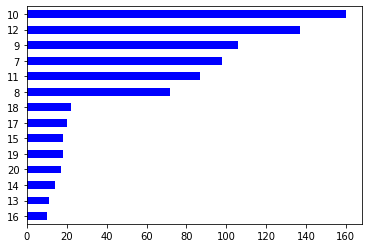

In [14]:
df['day'].value_counts().sort_values(ascending=True).plot(kind='barh',color='blue')  #ποια μέρα γράφτηκαν οι περισσότερες ειδήσεις

In [ ]:
#########################   NPL starts here

In [ ]:
headline = df['headline'].str.cat(sep = ' ')
headline

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import spacy
!python -m spacy download el_core_news_sm

In [2]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
stopwords = nlp.Defaults.stop_words

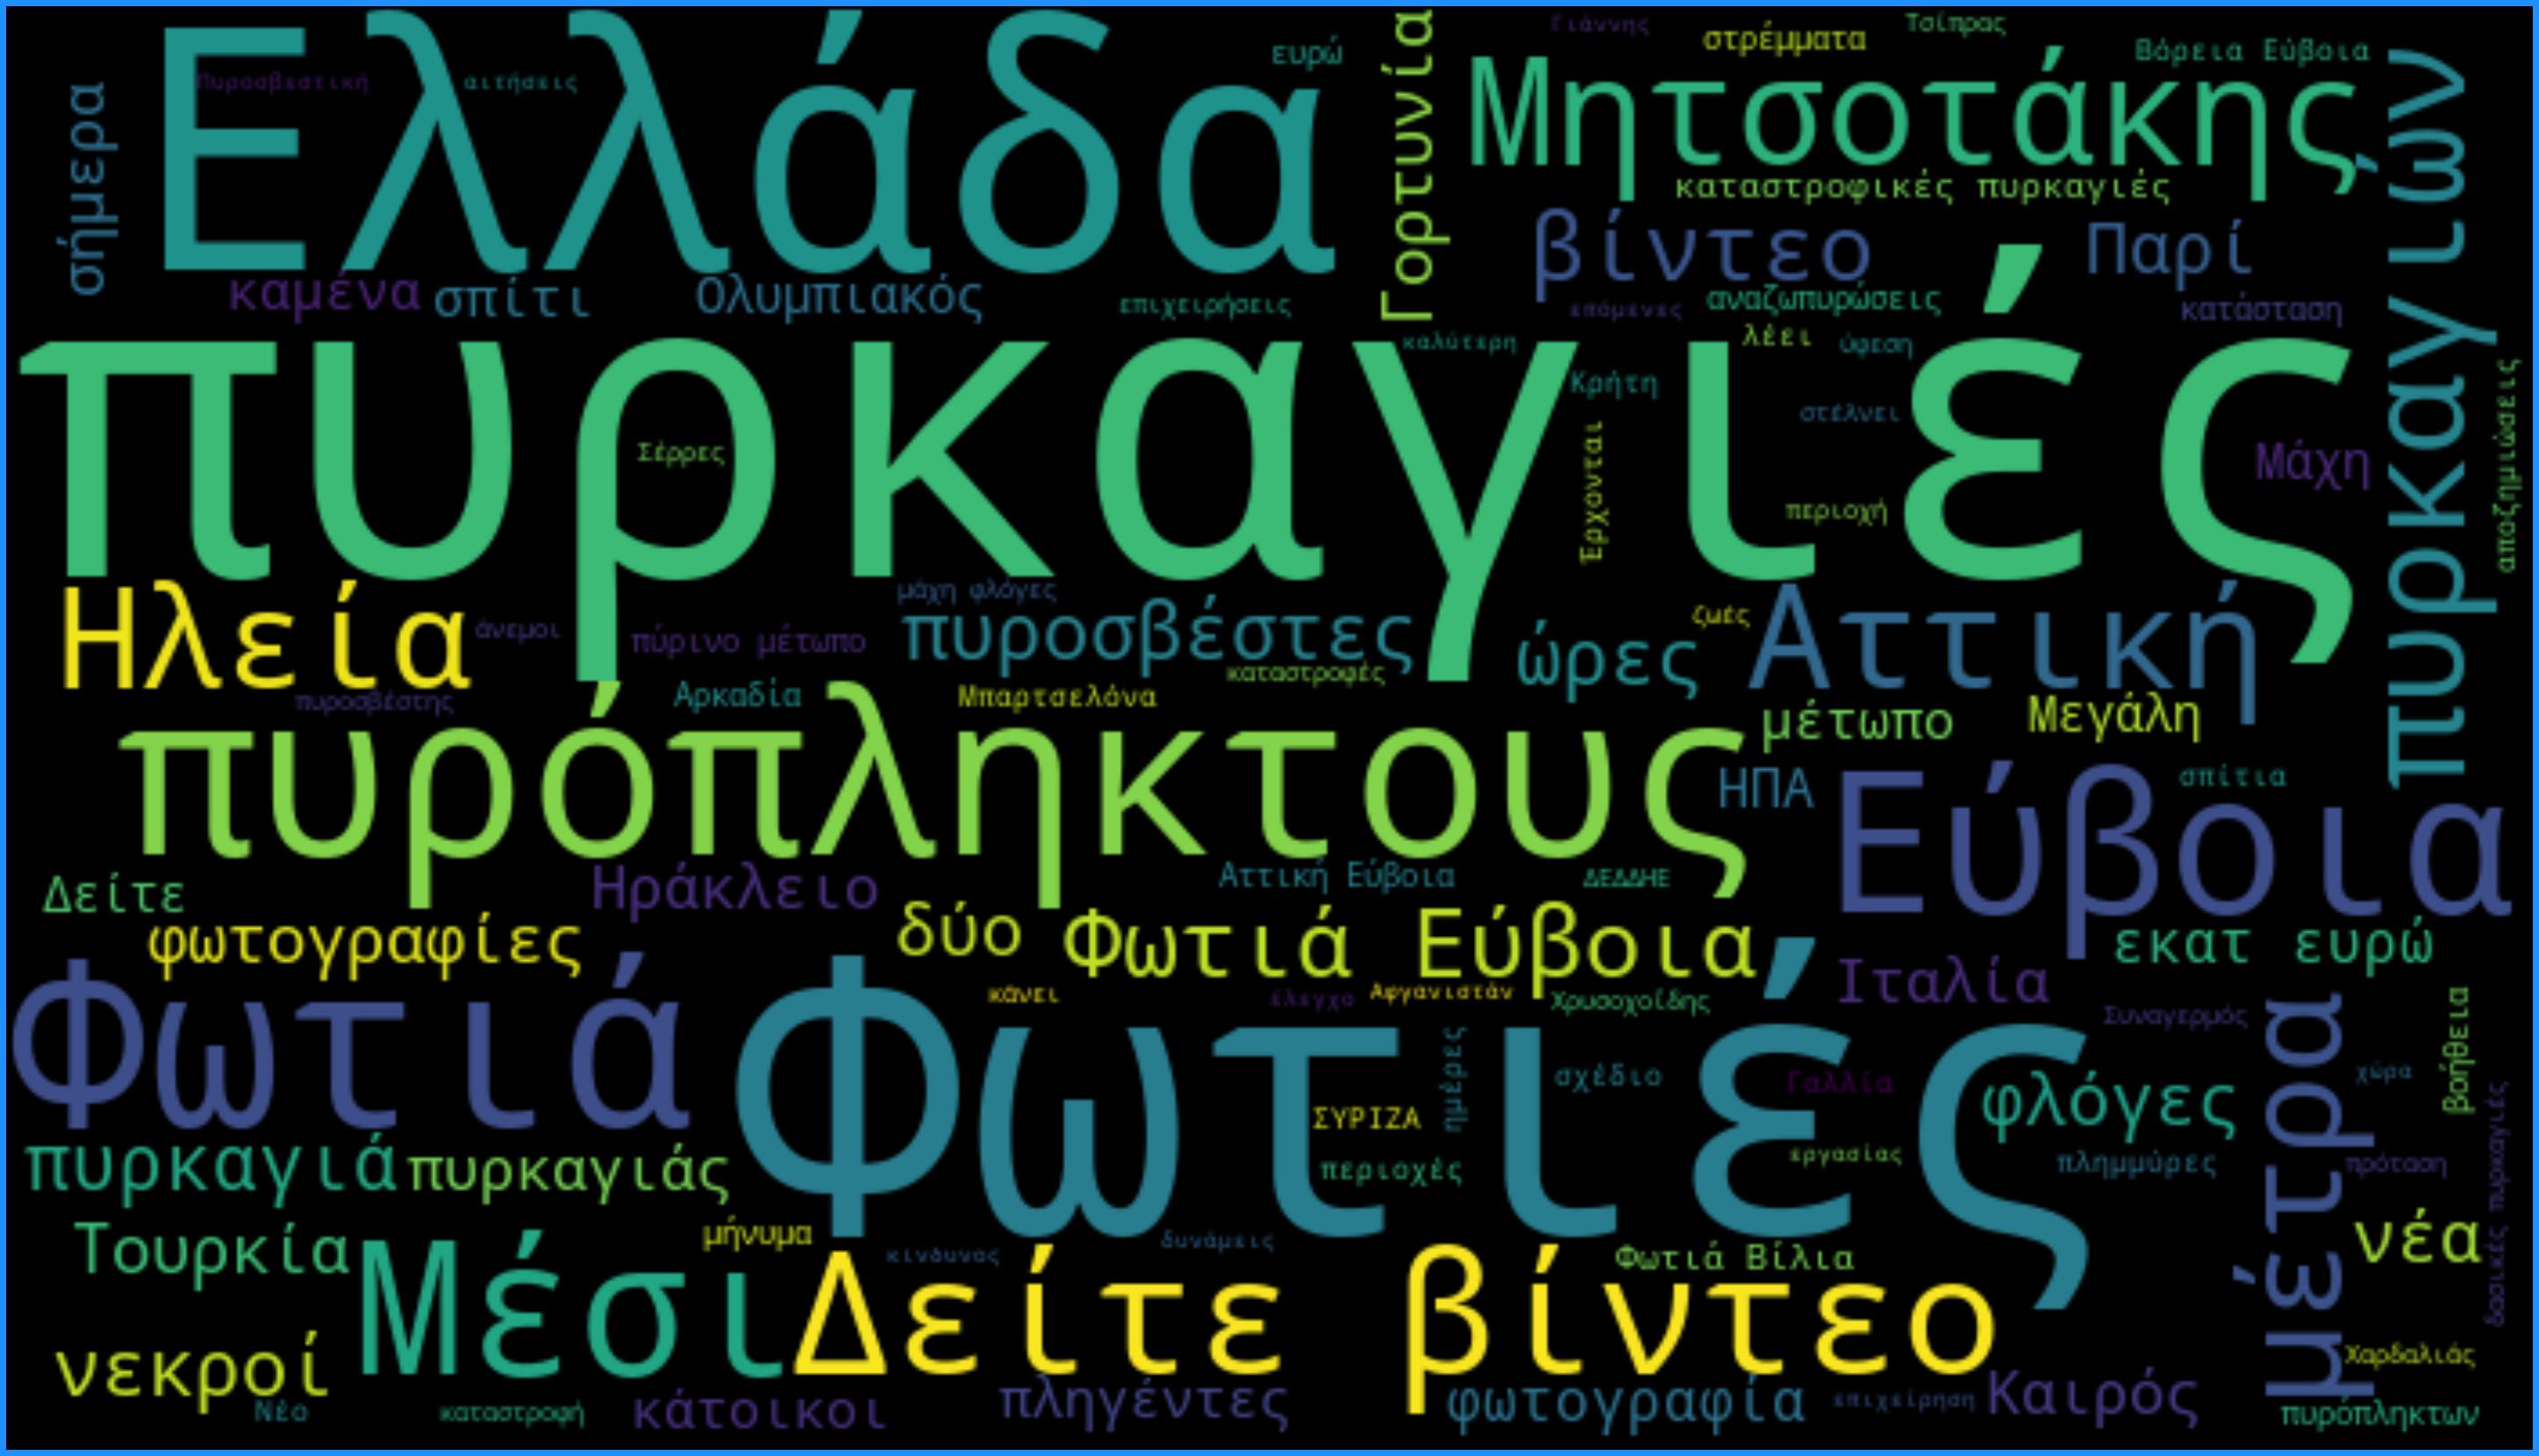

In [ ]:
wordcloud = WordCloud(stopwords = nlp.Defaults.stop_words, width = 700, height = 400, max_words = 100, background_color = 'black' ).generate(headline)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'red')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#protothema vectorization

In [ ]:
#vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer    
from html import unescape
cv = CountVectorizer()

In [ ]:
headline_vector = cv.fit_transform(df['headline'])

In [ ]:
def my_tokenizer(headline):
    text_clean = unescape(headline).lower()  
    tokens = nlp(text_clean)  
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
    return lemmatized_tokens

In [ ]:
cv = CountVectorizer(stop_words= stopwords, min_df=0.01, max_df=0.95,tokenizer= my_tokenizer) 
headline_vector = cv.fit_transform(df['headline']) 

In [ ]:
headlinedf = pd.DataFrame(headline_vector.toarray(), columns=cv.get_feature_names()) 
headlinedf

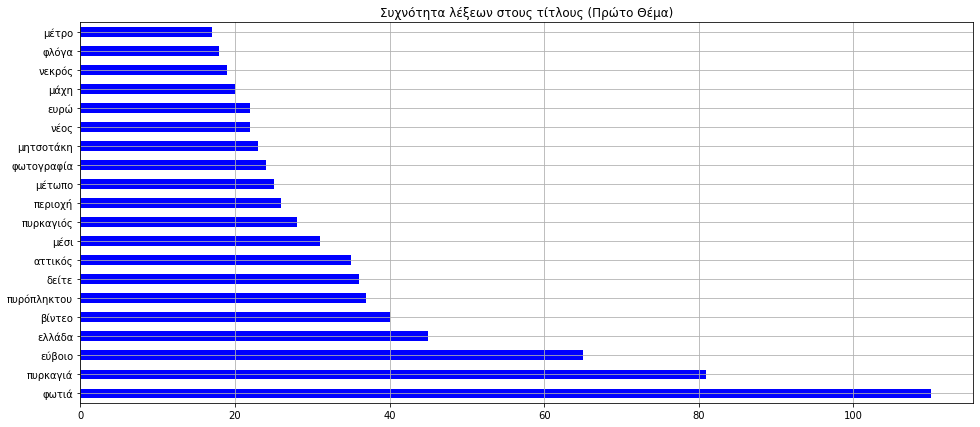

In [ ]:
headline_words = headlinedf.sum(axis =0)
headline_words.sort_values(ascending= False).head(20).plot(kind='barh', color='b', grid= True, title= 'Συχνότητα λέξεων στους τίτλους (Πρώτο Θέμα)',figsize= (16,7)) 

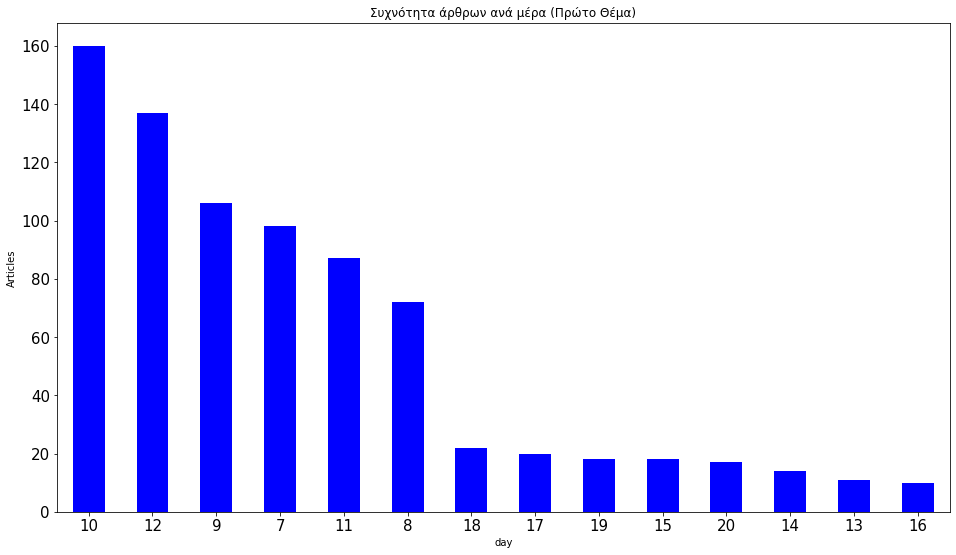

In [ ]:
df['day'].value_counts(ascending= False).plot(kind= 'bar', xlabel= 'day', ylabel= 'Articles', color='b', title= 'Συχνότητα άρθρων ανά μέρα (Πρώτο Θέμα)', figsize= (16,9), fontsize= 15, rot= 0)

In [ ]:
cv = CountVectorizer( stop_words= stopwords, max_features=20, ngram_range=(2, 2), tokenizer=my_tokenizer, analyzer= 'word', min_df= 0.01, max_df= 0.90)
count_vector = cv.fit_transform(df['headline'])
headlinebidf = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
headlinebidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασα', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικας', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'εαυτός', 'εκάστα', 'εκάστο', 'ετέρο', 'ετού', 'ετούτε', 'ευθύ', 'εχτής', 'ιδίο', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρο', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιής', 'ποιώ', 'πολλός', 'προχθά', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύτε', 'ταύτο', 'τούτε', 'όποι', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


αττικός εύβοιο  δείτε βίντεο  ...  φωτιά βίλι  φωτιά εύβοιο
0               0             0  ...           0             0
1               0             0  ...           0             0
2               0             0  ...           0             0
3               0             0  ...           0             0
4               0             0  ...           0             0

[5 rows x 7 columns]

In [ ]:
headlinebidf = headlinebidf.sum(axis =0)

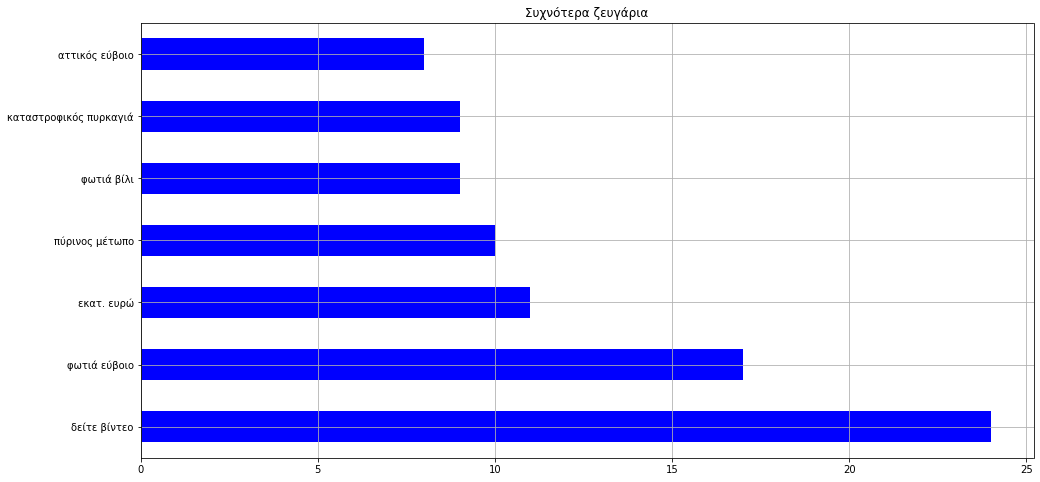

In [ ]:
headlinebidf.sort_values(ascending= False).plot(kind='barh', color='b', grid= True,title= 'Συχνότερες φράσεις (Πρώτο Θέμα)', figsize= (16,8)) 

# Protothema emotional (skip)
### maybe leave emo for twitter and skai summary 

In [ ]:
df = pd.read_csv("protothemafires.csv")

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
from datetime import datetime
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)

In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [ ]:
df['date'] = pd.to_datetime(df.date) #need datetime conversion again

In [ ]:
df['year'] = pd.DatetimeIndex(df['date']).year
df['month'] = pd.DatetimeIndex(df['date']).month
df['day'] = pd.DatetimeIndex(df['date']).day

In [ ]:
df['headline']= df['headline'].str.replace('\n','')  

In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['headline'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [ ]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [ ]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
df.set_index('date', inplace=True)

In [ ]:
df['headline'].str.len().groupby(by=df.index.month).mean().plot()


In [ ]:
df['positivity'].resample('M').mean().plot()   ### fix date not showing up


# Skai analysis

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Skai_purkagies.csv')

In [ ]:
df

In [ ]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y - %H:%M')    #### datetime

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df.set_index('Date', inplace= True)
df

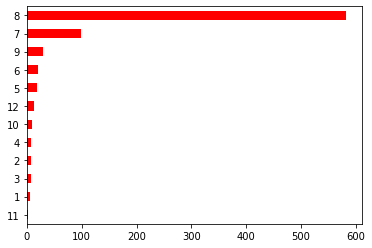

In [ ]:
df['month'].value_counts().sort_values(ascending=True).plot(kind='barh',color='red')  #ποιο μήνα γράφτηκαν οι περισσότερες ειδήσεις

In [ ]:
# installation from previous step (protothema)

In [ ]:
df['Summary'] = df['Summary'].str.replace('\r','')
df['Summary'] = df['Summary'].str.replace('\n','') 
df['Summary'] = df['Summary'].str.replace('\t','') 

In [ ]:
df['Summary'][3]

'Του Νίκου Παπαδόπουλου*Αν μπορούσα να μεταφράσω τη λέξη μέλλον χρησιμοποιώντας αντί λόγια, μια φωτογραφία, θα ήταν εκείνη των παιδιών ηλικίας 15 ετών που…'

In [ ]:
df.to_csv('/content/gdrive/My Drive/Colab Notebooks/Skai_purkagies_clean.csv')  #saving without the index change

In [ ]:
headline_text = df['Headline'].str.cat(sep = ' ')
summary_text = df['Summary'].str.cat(sep = ' ')

In [ ]:
skai_text = headline_text + summary_text   #όλο το κείμενο 

In [ ]:
# installation from previous step (protothema)

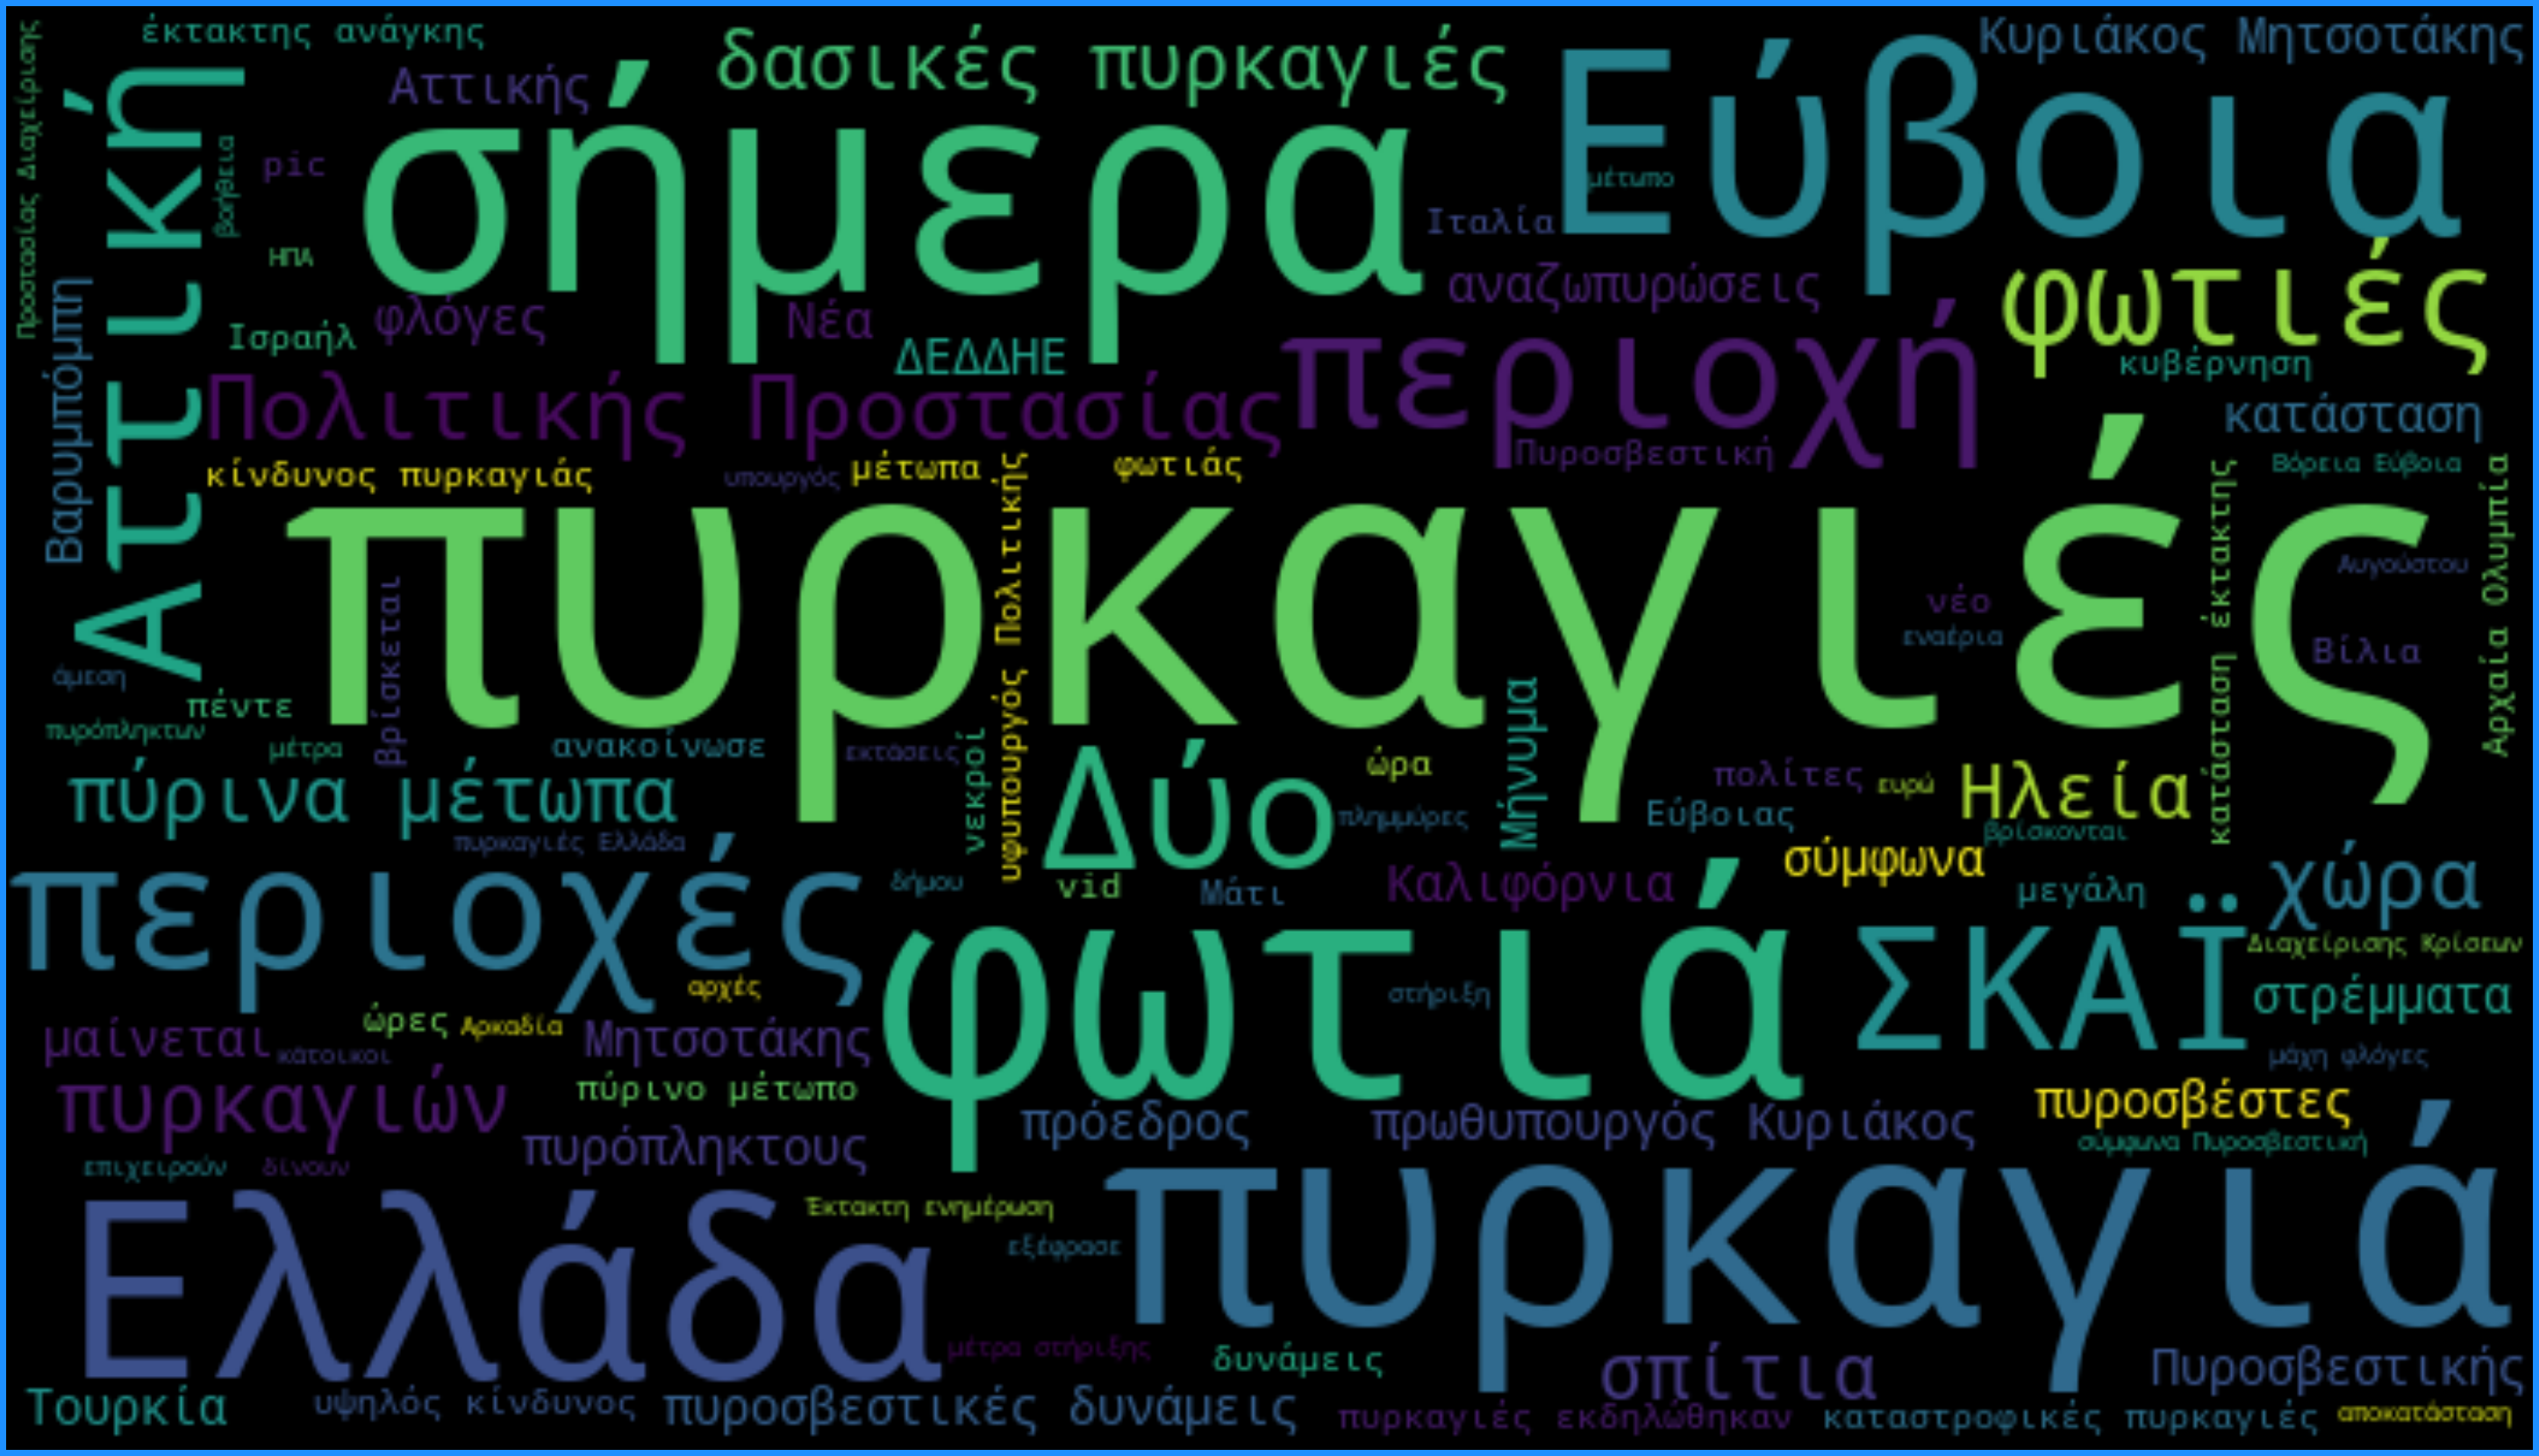

In [ ]:
wordcloud = WordCloud(stopwords = nlp.Defaults.stop_words, width = 700, height = 400, max_words = 100, background_color = 'black' ).generate(skai_text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'dodgerblue',
    edgecolor = 'red')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#skai vectorization

In [ ]:
#vectorization

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer    
from html import unescape
cv = CountVectorizer()

In [ ]:
headline_vector = cv.fit_transform(df['Headline'])

In [ ]:
def my_tokenizer(headline):
    text_clean = unescape(headline).lower()  
    tokens = nlp(text_clean)  
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
    return lemmatized_tokens

In [ ]:
cv = CountVectorizer(stop_words= stopwords, min_df=0.01, max_df=0.95,tokenizer= my_tokenizer) 
headline_vector = cv.fit_transform(df['Headline']) 

In [ ]:
headlinedf = pd.DataFrame(headline_vector.toarray(), columns=cv.get_feature_names()) 
headlinedf

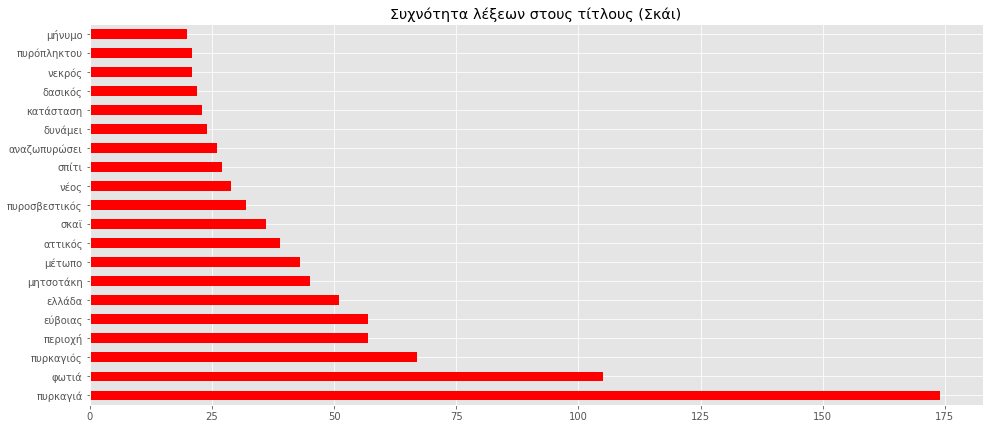

In [ ]:
headline_words = headlinedf.sum(axis =0)
headline_words.sort_values(ascending= False).head(20).plot(kind='barh', color='r', grid= True, title= 'Συχνότητα λέξεων στους τίτλους (Σκάι)',figsize= (16,7)) 

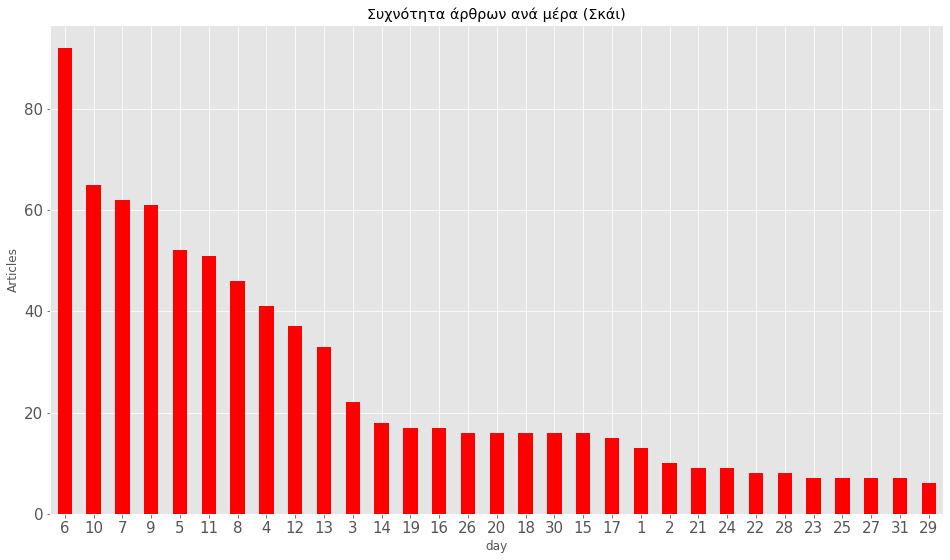

In [ ]:
df['day'].value_counts(ascending= False).plot(kind= 'bar', xlabel= 'day', ylabel= 'Articles', color='r', title= 'Συχνότητα άρθρων ανά μέρα (Σκάι)', figsize= (16,9), fontsize= 15, rot= 0)

In [ ]:
cv = CountVectorizer( stop_words= stopwords, max_features=20, ngram_range=(2, 2), tokenizer=my_tokenizer, analyzer= 'word', min_df= 0.01, max_df= 0.90)
count_vector = cv.fit_transform(df['Headline'])
headlinebidf = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
headlinebidf.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['έγκαιρος', 'έκασ', 'έκασα', 'έκαστε', 'έξαφνος', 'έτερου', 'ίσιος', 'αδιάκοπο', 'αλλιώτικο', 'αλλοιώτικο', 'αφότο', 'βεβαιότατο', 'γρήγορο', 'δίχω', 'εαυτή', 'εκάστο', 'ευθύ', 'εχτέ', 'ιδίο', 'κάμποσε', 'κάνω', 'καθενό', 'κανενό', 'μέλλομαι', 'μεμιά', 'μερικού', 'μερικός', 'μπορώ', 'μόνα', 'ολωσδιόλο', 'ολόγυρας', 'ορισμένο', 'ορισμένος', 'ορισμένω', 'ποιώ', 'πολλός', 'προχθής', 'προχτής', 'πόσε', 'πόσο', 'σει', 'στος', 'συχνά', 'ταύ', 'ταύτε', 'ταύτο', 'τόσε', 'όποι', 'όσε'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


ανατολικός μάνη  αρχαίος ολυμπίας  ...  πύρινος μέτωπο  υψηλός κίνδυνος
0  0                0                 ...  0               0              
1  0                0                 ...  0               0              
2  0                0                 ...  0               0              
3  0                0                 ...  0               0              
4  0                0                 ...  0               0              

[5 rows x 11 columns]

In [ ]:
headlinebidf = headlinebidf.sum(axis =0)

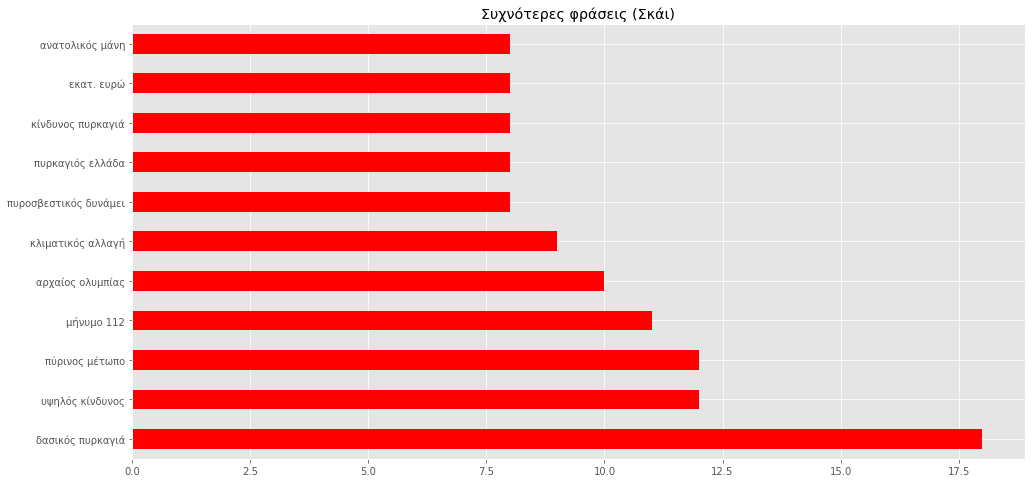

In [ ]:
headlinebidf.sort_values(ascending= False).plot(kind='barh', color='r', grid= True,title= 'Συχνότερες φράσεις (Σκάι)', figsize= (16,8)) 

# cosine similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words= nlp.Defaults.stop_words, max_features=500)
tfidf_matrix_train = tfidf_vectorizer.fit_transform(df['Summary'])

In [ ]:
results = pd.DataFrame(tfidf_matrix_train.toarray(), columns=tfidf_vectorizer.get_feature_names()) 
results.head()

00  000   10   11  112   12  ...      χώρα  χώρας     χώρες  ύφεση  ώρα  ώρες
0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0    0.438267  0.0    0.0  0.0 
1  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0    0.000000  0.0    0.0  0.0 
2  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0    0.000000  0.0    0.0  0.0 
3  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000  0.0    0.000000  0.0    0.0  0.0 
4  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.409954  0.0    0.000000  0.0    0.0  0.0 

[5 rows x 500 columns]

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train[0:1], tfidf_matrix_train))

In [ ]:
print("cosine scores ==> ",cosine_similarity(tfidf_matrix_train, tfidf_matrix_train))

cosine scores ==>  [[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.         0.         0.0711276 ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.39613082]
 [0.         0.0711276  0.         ... 0.         0.39613082 1.        ]]


In [ ]:
arr = cosine_similarity(tfidf_matrix_train, tfidf_matrix_train)

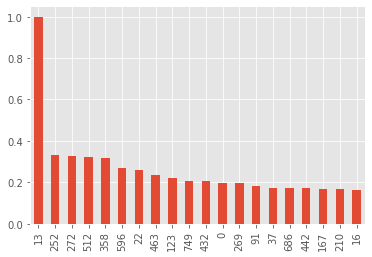

In [ ]:
pd.DataFrame(arr).loc[13].sort_values(ascending = False).head(20).plot(kind = 'bar')

In [ ]:
df['Headline'].loc[13]

'Πυροσβεστική: Νέα ενίσχυση με δυνάμεις από εξωτερικό - Το «ευχαριστώ» Μητσοτάκη στους Πολωνούς'

In [ ]:
df['Headline'].loc[252]

'Έρχονται στην Ελλάδα 219 Γερμανοί πυροσβέστες για βοήθεια -Ειδικοί στις αναζωπυρώσεις'

# Skai emotional

In [88]:
df = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Skai_purkagies.csv')

In [89]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
from datetime import datetime
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [90]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)

In [91]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [92]:
df 

Headline  ...                Date
0    Μητσοτάκης- Ερντογάν για Αφγανιστάν: Έχουμε κο...  ...  20/08/2021 - 20:42
1    Πυρκαγιές-Αυτοψίες: 408 οι επικίνδυνες κατοικί...  ...  20/08/2021 - 18:23
2    Πυρόπληκτοι: Καταβλήθηκαν οι πρώτες αποζημιώσε...  ...  20/08/2021 - 16:53
3    Ο ρόλος της παιδείας σε μα χώρα που... καίγετα...  ...  20/08/2021 - 13:53
4     Επίσκεψη της ΟΝΝΕΔ και του τομέα Προστασίας τ...  ...  20/08/2021 - 13:49
..                                                 ...  ...                 ...
795  Εργασία: Τι αλλάζει σε ωράριο, μισθούς, εισφορ...  ...  29/05/2020 - 13:03
796  Copernicus: Φόβοι για πυρκαγιές «ζόμπι» λόγω τ...  ...  27/05/2020 - 19:52
797                   Γκρεμίστε τα κουφάρια της Αθήνας  ...  16/05/2020 - 11:44
798  Το Πρότυπο Σχεδίο Αντιμετώπισης Εκτάκτων Αναγκ...  ...  11/05/2020 - 19:45
799  Μητσοτάκης σε Πυροσβεστική: Η αποφυγή συνωστισ...  ...  11/05/2020 - 11:25

[800 rows x 3 columns]

In [93]:
df['Date'] = pd.to_datetime(df.Date, format='%d/%m/%Y - %H:%M')    #### datetime

In [94]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [95]:
df['Summary'] = df['Summary'].str.replace('\r','')
df['Summary'] = df['Summary'].str.replace('\n','') 
df['Summary'] = df['Summary'].str.replace('\t','') 

In [96]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [97]:
matrix = vec.fit_transform(df['Summary'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε', 

αφεση  ενορκη βεβαιωση  εχοντας  εχω  ...  κροκος αυγου  νεοτερος  ζεφυρος  ζουμ
0      0                0        0    0  ...             0         0        0     0
1      0                0        0    0  ...             0         0        0     0
2      0                0        0    0  ...             0         0        0     0
3      0                0        0    0  ...             0         0        0     0
4      0                0        0    0  ...             0         0        0     0

[5 rows x 13161 columns]

In [98]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [99]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [100]:
df.set_index('Date', inplace=True)

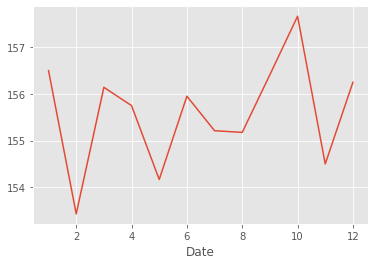

In [101]:
df['Summary'].str.len().groupby(by=df.index.month).mean().plot()  #avg length of characters by month)

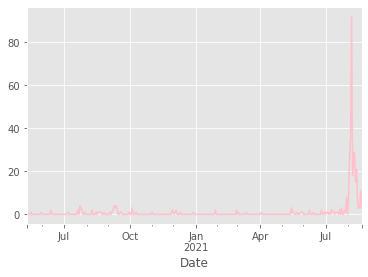

In [102]:
df['trust'].resample('B').sum().plot(color = 'pink')

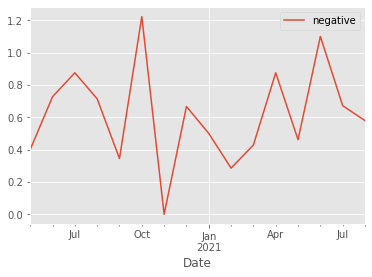

In [103]:
df['negative'].resample('M').mean().plot(label = 'negative').legend()

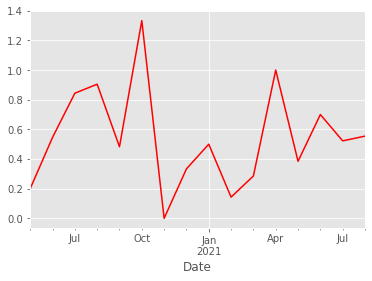

In [104]:
df['fear'].resample('M').mean().plot(color = 'red')

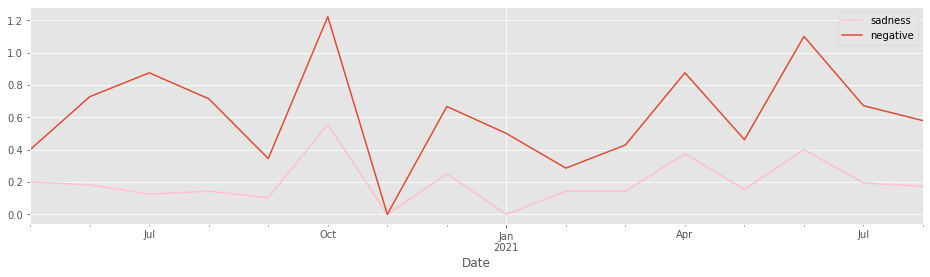

In [105]:
ax = df['sadness'].resample('M').mean().plot(color = 'pink')
df['negative'].resample('M').mean().plot(figsize=(16,4), label = 'negative', ax=ax).legend()

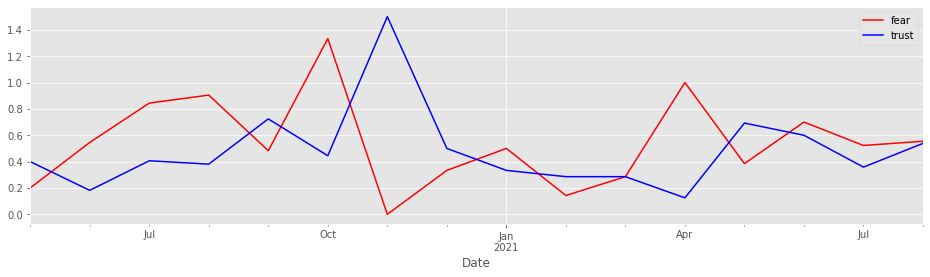

In [106]:
ax = df['fear'].resample('M').mean().plot(color = 'red')
df['trust'].resample('M').mean().plot(figsize=(16,4), ax = ax, color = 'blue').legend()

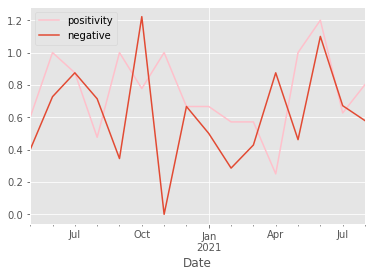

In [107]:
ax = df['positivity'].resample('M').mean().plot(color = 'pink')
df['negative'].resample('M').mean().plot(label = 'negative', ax=ax).legend()

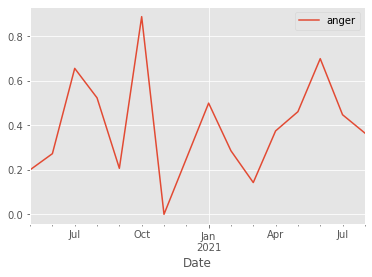

In [109]:
df['anger'].resample('M').mean().plot(label = 'anger').legend()

# Twitter analysis

In [ ]:
import pandas as pd

In [ ]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/twitter_firess.tsv", sep='\t')

In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'])  ## successfully converted to datetime

In [ ]:
df

In [ ]:
twitter_text = df['text'].str.cat(sep = ' ').replace('RT', ' ')
#twitter_text = twitter_text.replace(r'https',' ')  
twitter_text = twitter_text.replace(r'://t.co', ' ')
twitter_text = twitter_text.replace('https', ' ')
twitter_text = twitter_text.replace('co', ' ')
twitter_text = twitter_text.replace('\n', ' ')
twitter_text = twitter_text.replace('Erickson', ' ')
twitter_text = twitter_text.replace('mariosvryoni', ' ')
twitter_text

'Δασικές πυρκαγιές: Θλιβερή πρωτιά για την Ελλάδα, με αύξηση 500% στην καμένη γη   /C2zl0QBuNz #newsbreak   @Marka2_: Διεθνές ξεφτίλισμα του επιτελικού κράτους του #Κουλη. Στο αυστραλιανο τηλεπαιχνιδι «Have You Been Paying Attention» το διάγγελ…   @sisyfos73: Σας βιάζουν; Στην Αργεντινή είναι χειρότερα. Πεθαίνετε αβοήθητοι από κορονοϊό; Το Βέλγιο τα πάει χειρότερα. Σας ενοχλεί ο ντ…   @Anna_Elefanti: Το διεθνές ρεζιλίκι συνεχίζεται: Το αυστραλιανό τηλεπαιχνίδι «Have You Been Paying Attention» χλευάζει τον κ. Κυριάκο Μη…   @KYTKYTKYTKYTKYT: Πυροσβέστες Εύβοιας: «Μας έδωσαν όχημα χωρίς φρένα και μας είπαν να πηγαίνουμε σιγά»    #Χρυσοχοιδη_παραιτησου #Βίλια…   @AvgiOnline: Παράνομη προκήρυξη με προθεσμία υποβολής προσφορών μέσα σε μιάμιση ημέρα ερήμην της δασικής υπηρεσίας #φωτιες #πυρκαγιές #κ… Πήγε μια υδροφορα ο Πατουλης  στις πυρκαγιες να ανεφοδιάζονται τα Καναντερ μαζεύτηκαν εκεί ολοι οι ρεπορτερ κ πόσο…   /m6W4qh8LxU Στις πυρκαγιές είχαμε το επιτελικό κράτος και με τον Ερντι έχουμε

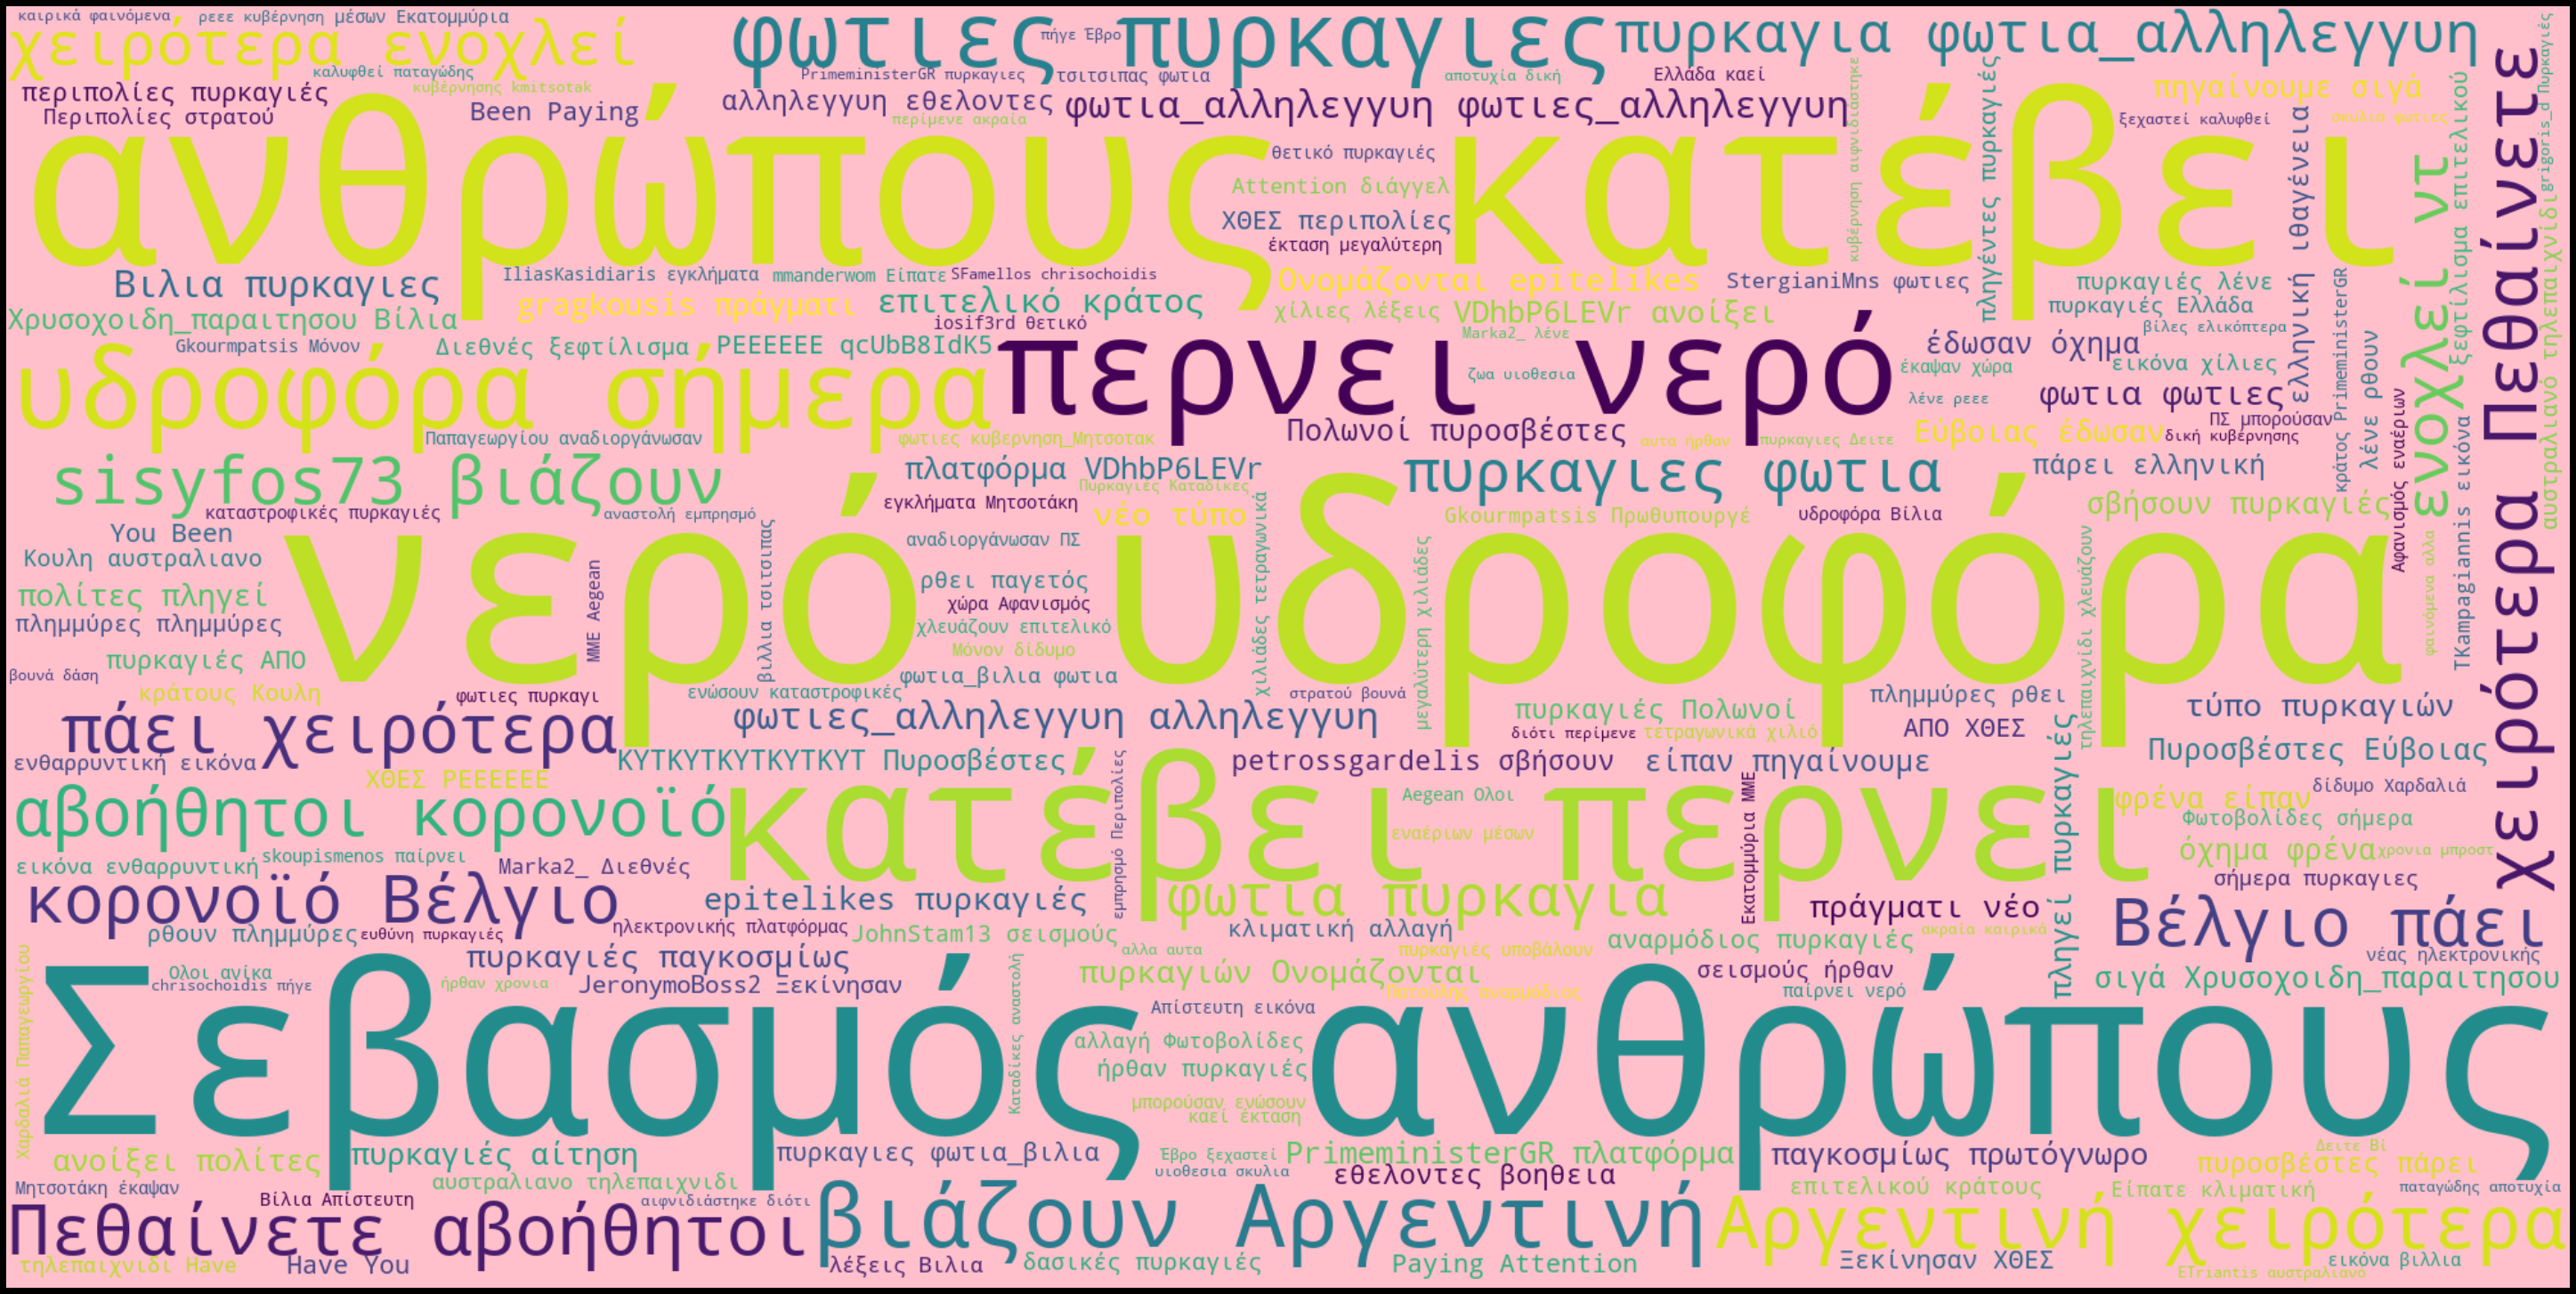

In [ ]:
wordcloud = WordCloud( stopwords = nlp.Defaults.stop_words, width = 2000, height = 1000, background_color = 'pink').generate(twitter_text)
fig = plt.figure(figsize = (40, 30), facecolor = 'k', edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#Twitter vectorization (skip)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.feature_extraction.text import CountVectorizer    
from html import unescape
cv = CountVectorizer()

In [ ]:
df['text'] = df['text'].replace('https', ' ')
df['text'] = df['text'].replace('co', ' ')
df['text'] = df['text'].replace('mariosvryoni', ' ')
df['text'] = df['text'].replace('Erickson', ' ')
df['text'] = df['text'].replace('RT', ' ')

In [ ]:
#twitter_vector = cv.fit_transform(df['text'])

In [ ]:
def my_tokenizer(headline):
    text_clean = unescape(headline).lower()  
    tokens = nlp(text_clean)  
    lemmatized_tokens = [token.lemma_ for token in tokens if (len(str(token.lemma_))>2)]
    return lemmatized_tokens

In [ ]:
cv = CountVectorizer(stop_words= stopwords, min_df=0.01, max_df=0.95,tokenizer= my_tokenizer) 

In [ ]:
count_vector = cv.fit_transform(df['text'])

In [ ]:
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

\n\n    -αφανισμός  -εκατομμύρι  -ολοι  ...  χρόνια  χώρα  όχημα  ώρα
0  0       0           0            0      ...  0       0     0      0  
1  0       0           0            0      ...  0       0     0      0  
2  0       0           0            0      ...  0       0     0      0  
3  0       0           0            0      ...  0       0     0      0  
4  1       0           0            0      ...  0       0     1      0  

[5 rows x 201 columns]

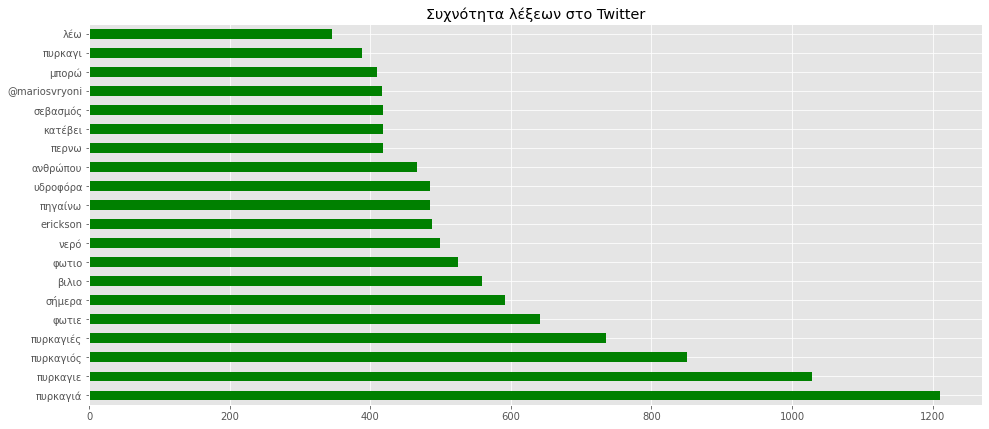

In [ ]:
twitter_words = results.sum(axis =0)
twitter_words.sort_values(ascending= False).head(20).plot(kind='barh', color='g', grid= True, title= 'Συχνότητα λέξεων στο Twitter',figsize= (16,7)) 

 #use different results

In [ ]:
cv = CountVectorizer( stop_words= nlp.Defaults.stop_words, max_features=20, ngram_range=(2, 2) )
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

erickson κατέβει  https co  ...  φωτιες πυρκαγιες  χειρότερα πεθαίνετε
0  0                 1         ...  0                 0                  
1  0                 0         ...  0                 0                  
2  0                 0         ...  0                 1                  
3  0                 0         ...  0                 0                  
4  0                 0         ...  0                 0                  

[5 rows x 20 columns]

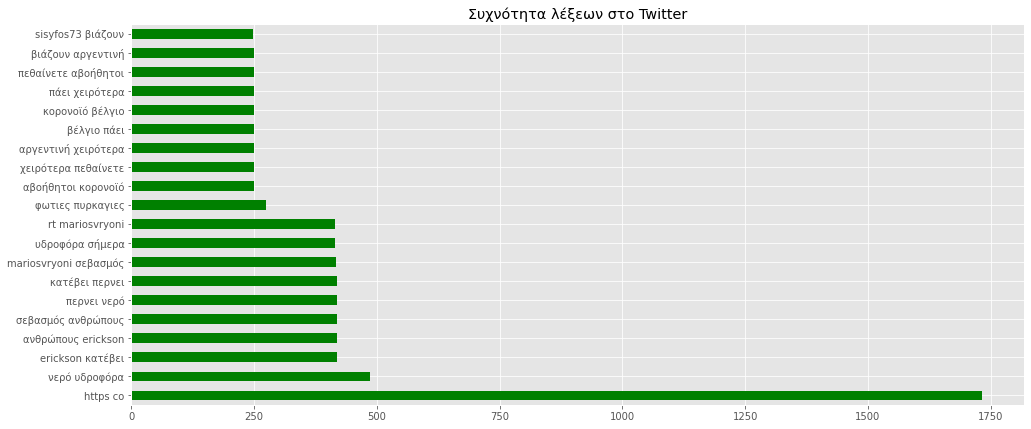

In [ ]:
twitter_words = results.sum(axis =0)
twitter_words.sort_values(ascending= False).head(20).plot(kind='barh', color='g', grid= True, title= 'Συχνότητα λέξεων στο Twitter',figsize= (16,7)) 

In [ ]:
cv = CountVectorizer(stop_words= nlp.Defaults.stop_words, min_df=0.01, max_df=0.95, tokenizer=my_tokenizer)
count_vector = cv.fit_transform(df['text'])
results = pd.DataFrame(count_vector.toarray(), columns=cv.get_feature_names()) 
results.head()

In [ ]:
twitter_words = results.sum(axis =0)
twitter_words.sort_values(ascending= False).head(20).plot(kind='barh', color='g', grid= True, title= 'Συχνότητα λέξεων στο Twitter',figsize= (16,7)) 

In [ ]:
# for Twitter it's better to do emotional analysis anyway

# Twitter emotional

In [57]:
import pandas as pd
%matplotlib inline
import numpy as np
import re
from datetime import datetime
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [58]:
df =pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/twitter_firess.tsv", sep='\t')

In [59]:
filepath = "https://raw.githubusercontent.com/datajour-gr/Data_journalism/master/week10/NRC_GREEK_Translated_6_2020.csv"
emolex_df = pd.read_csv(filepath)

In [60]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(drop = True, inplace = True)

In [61]:
df['created_at'] = pd.to_datetime(df['created_at']) 

In [62]:
df['text'] = df['text'].str.replace(r'https?:\/\/.*[\r\n]*'," ")

In [63]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word, 
                      strip_accents = 'unicode',  
                      stop_words= nlp.Defaults.stop_words,
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(df['text'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

In [65]:
angry_words = emolex_df[emolex_df.Anger == 1]['word']
positive_words = emolex_df[emolex_df.Positive == 1]['word']
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']
negative_words = emolex_df[emolex_df.Negative == 1]['word']
joy_words = emolex_df[emolex_df.Joy == 1]['word']
trust_words = emolex_df[emolex_df.Trust == 1]['word']
fear_words = emolex_df[emolex_df.Fear == 1]['word']

In [66]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)
df['positivity'] = wordcount_df[positive_words].sum(axis=1)
df['joy'] = wordcount_df[joy_words].sum(axis=1)
df['disgust'] = wordcount_df[disgust_words].sum(axis=1)
df['surprise'] = wordcount_df[surprise_words].sum(axis=1)
df['trust'] = wordcount_df[trust_words].sum(axis=1)
df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)
df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
df['negative'] = wordcount_df[negative_words].sum(axis=1)
df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [67]:
df.set_index('created_at' , inplace=True)

In [ ]:
df

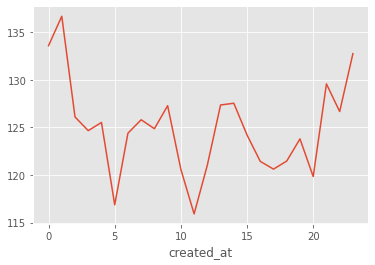

In [75]:
df['text'].str.len().groupby(by=df.index.hour).mean().plot()  # μεσος αριθμος χαρακτήρων tweet ανά ώρα της ημέρας

In [70]:
df['text'].str.len().mean()

123.30716666666666

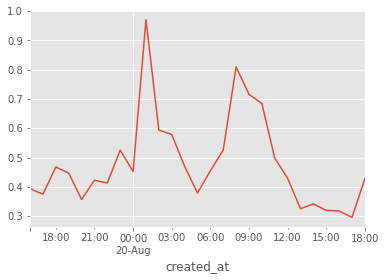

In [71]:
df['positivity'].resample('H').mean().plot()  #sum()

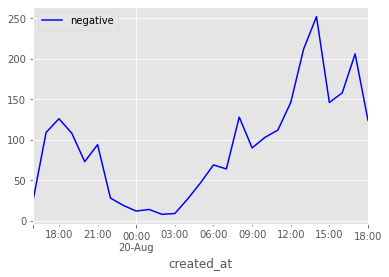

In [72]:
df['negative'].resample('H').sum().plot(color = 'b',label = 'negative').legend()

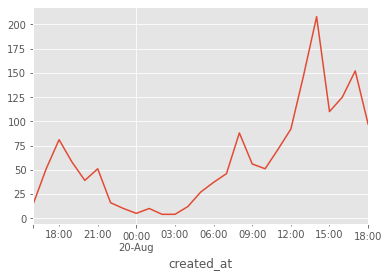

In [73]:
df['anger'].resample('H').sum().plot()

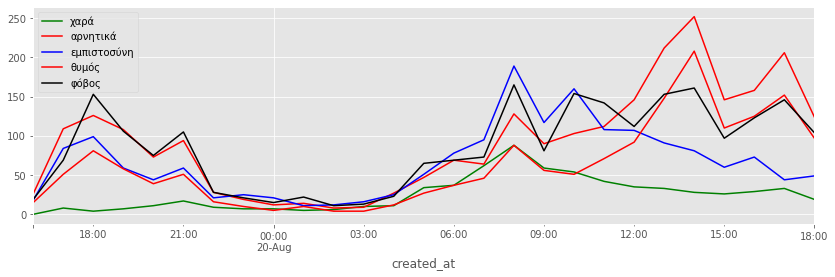

In [87]:
ax = df['joy'].resample('H').sum().plot(figsize=(14,4), color = 'green',label='χαρά', )
df['negative'].resample('H').sum().plot(figsize=(14,4), ax = ax, color = 'red',label= 'αρνητικά')
df['trust'].resample('H').sum().plot(figsize=(14,4), ax = ax, color = 'blue', label='εμπιστοσύνη')
df['anger'].resample('H').sum().plot(figsize=(14,4), ax = ax, color = 'red', label='θυμός')
df['fear'].resample('H').sum().plot(figsize=(14,4), ax = ax, color = 'black', label='φόβος').legend()

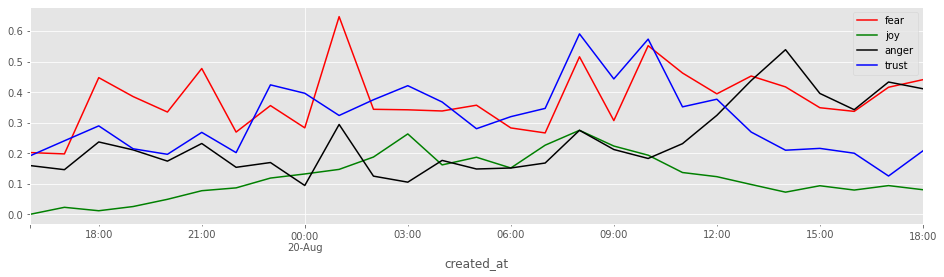

In [86]:
ax = df['fear'].resample('H').mean().plot(color = 'red')
df['joy'].resample('H').mean().plot(color = 'green',label='joy', )
df['anger'].resample('H').mean().plot(color = 'black',label='anger', )
df['trust'].resample('H').mean().plot(figsize=(16,4), ax = ax, color = 'blue').legend()

In [74]:
# I didn't use .sum(), .mean() is more meaningful as we want to see the data as a whole and not be constrained by more / less data depending on the time of the day

# EXTRA - Fire data

In [110]:
# μπαίνουμε στα δεδομένα της πυροσβεστικής υπηρεσίας ΕΔΩ: https://www.fireservice.gr/el_GR/synola-dedomenon για περισσότερα δεδομένα σχετικά με τις πυκαγιές. 
#ας δουλέψουμε με δεδομένα του 2020

In [233]:
df =pd.read_excel("/content/gdrive/My Drive/Colab Notebooks/Dasikes_Pyrkagies_2020.xls")   #index_col=None, header=None

In [ ]:
df.head(3)

In [234]:
new_header = df.iloc[0] 
df = df[1:] 
df.columns = new_header 
df.head(3)

0 Α/Α ΕΓΓΡΑΦΗΣ Α/Α ENGAGE X-ENGAGE  ... Α/Φ CL215 Α/Φ PZL Α/Φ GRU.
1      1526936          0        0  ...         0       0        0
2      1526708          0        0  ...         0       0        0
3      1529116          0        0  ...         0       0        0

[3 rows x 36 columns]

In [ ]:
df.head(10)

In [235]:
column_list = ['Υπηρεσία', 'Νομός', 'Ημερ/νία Έναρξης', 'Ώρα Έναρξης', 'Ημερ/νία Κατασβεσης', 'Ώρα Κατάσβεσης', 'Δήμος', 'Δάση',	'Δασική Έκταση',	'Άλση',	'Χορτ/κές Εκτάσεις',	'Καλάμια - Βάλτοι',	'Γεωργικές Εκτάσεις',	'Υπολλείματα Καλλιεργειών',	'Σκουπι-δότοποι',	'ΠΥΡΟΣ. ΣΩΜΑ',	'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ',	'ΕΘΕΛΟ-ΝΤΕΣ',	'ΣΤΡΑΤΟΣ',	'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ',	'ΠΥΡΟΣ. ΟΧΗΜ.' ]

In [236]:
df = df[column_list]

In [ ]:
df.head(5)

In [ ]:
df.dtypes

In [120]:
df.describe

<bound method NDFrame.describe of 0                     Υπηρεσία      Νομός  ... ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ ΠΥΡΟΣ. ΟΧΗΜ.
1        Π.Υ. ΒΙ.ΠΕ. ΚΟΜΟΤΗΝΗΣ    ΡΟΔΟΠΗΣ  ...              0            1
2         Π.Υ. ΑΛΕΞΑΝΔΡΟΥΠΟΛΗΣ      ΕΒΡΟΥ  ...              0            1
3          1ος  Π.Σ. ΙΩΑΝΝΙΝΩΝ  ΙΩΑΝΝΙΝΩΝ  ...              0            1
4          1ος  Π.Σ. ΙΩΑΝΝΙΝΩΝ  ΙΩΑΝΝΙΝΩΝ  ...              0            4
5                  Π.Υ. ΑΙΓΙΟΥ     ΑΧΑΙΑΣ  ...              0            1
...                        ...        ...  ...            ...          ...
11795           Π.Κ. ΚΡΑΝΙΔΙΟΥ  ΑΡΓΟΛΙΔΟΣ  ...              0            1
11796            Π.Κ. ΔΕΣΚΑΤΗΣ   ΓΡΕΒΕΝΩΝ  ...              0            1
11797           Π.Υ. ΚΑΤΕΡΙΝΗΣ    ΠΙΕΡΙΑΣ  ...              0            1
11798  Π.Κ. ΑΓΙΟΥ ΚΩΝΣΤΑΝΤΙΝΟΥ  ΦΘΙΩΤΙΔΑΣ  ...              0            2
11799              Π.Κ. ΑΝΔΡΟΥ   ΚΥΚΛΑΔΩΝ  ...              0            2

[11799 rows x 21 columns]>

In [129]:
df['Νομός'].value_counts().head(10)

ΗΛΕΙΑΣ              896
ΜΕΣΣΗΝΙΑΣ           833
ΠΕΛΛΑΣ              563
ΛΑΡΙΣΑΣ             551
ΕΒΡΟΥ               508
ΑΙΤΩΛΟΑΚΑΡΝΑΝΙΑΣ    495
ΚΟΡΙΝΘΙΑΣ           477
ΑΧΑΙΑΣ              438
ΚΑΡΔΙΤΣΑΣ           363
ΚΑΒΑΛΑΣ             352
Name: Νομός, dtype: int64

In [127]:
to_vis = df['Νομός'].value_counts().head(10)

In [128]:
to_vis.to_csv('/content/gdrive/My Drive/Colab top_nomoi.csv') #save to add to flourish
# flourish link to this visualization = https://public.flourish.studio/visualisation/7179849/ 

In [ ]:
df.dropna()

In [238]:
df['Ημερ/νία Έναρξης'] = pd.to_datetime(df['Ημερ/νία Έναρξης'])
df['Ώρα Έναρξης'] = pd.to_datetime(df['Ώρα Έναρξης'])
df['Ημερ/νία Κατασβεσης'] = pd.to_datetime(df['Ημερ/νία Κατασβεσης'])
df['Ώρα Κατάσβεσης'] = pd.to_datetime(df['Ώρα Κατάσβεσης'])   #datetime conversion

In [ ]:
df.dtypes

In [ ]:
conversion_dict = {'Δάση': float,
                'Δασική Έκταση': float, 
                'Άλση': float,
                'Χορτ/κές Εκτάσεις': float,
                'Καλάμια - Βάλτοι': float,
                'Γεωργικές Εκτάσεις': float,
                'Υπολλείματα Καλλιεργειών': float,
                'Σκουπι-δότοποι': float,
                'ΠΥΡΟΣ. ΣΩΜΑ': int,
                'ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ': int,
                'ΕΘΕΛΟ-ΝΤΕΣ': int,
                'ΣΤΡΑΤΟΣ': int,
                'ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ': int,
                'ΠΥΡΟΣ. ΟΧΗΜ.': int}  
  
df = df.astype(conversion_dict)  
print(df.dtypes)

#error. 'cannot convert float NaN to integer'  we could just convert those we are going to use.

In [151]:
df['ΠΥΡΟΣ. ΟΧΗΜ.'] = pd.to_numeric(df['ΠΥΡΟΣ. ΟΧΗΜ.'], errors='coerce')

In [153]:
df = df.dropna(subset=['ΠΥΡΟΣ. ΟΧΗΜ.'])

In [210]:
df['ΠΥΡΟΣ. ΟΧΗΜ.'] = df['ΠΥΡΟΣ. ΟΧΗΜ.'].astype(int)  

In [ ]:
df['ΕΘΕΛΟ-ΝΤΕΣ'] = pd.to_numeric(df['ΕΘΕΛΟ-ΝΤΕΣ'], errors='coerce')
df = df.dropna(subset=['ΕΘΕΛΟ-ΝΤΕΣ'])
df['ΕΘΕΛΟ-ΝΤΕΣ'] = df['ΕΘΕΛΟ-ΝΤΕΣ'].astype(int)  

In [ ]:
df.dtypes

In [ ]:
#df.set_index('Ώρα Έναρξης')

In [239]:
df

0                     Υπηρεσία      Νομός  ... ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ ΠΥΡΟΣ. ΟΧΗΜ.
1        Π.Υ. ΒΙ.ΠΕ. ΚΟΜΟΤΗΝΗΣ    ΡΟΔΟΠΗΣ  ...              0            1
2         Π.Υ. ΑΛΕΞΑΝΔΡΟΥΠΟΛΗΣ      ΕΒΡΟΥ  ...              0            1
3          1ος  Π.Σ. ΙΩΑΝΝΙΝΩΝ  ΙΩΑΝΝΙΝΩΝ  ...              0            1
4          1ος  Π.Σ. ΙΩΑΝΝΙΝΩΝ  ΙΩΑΝΝΙΝΩΝ  ...              0            4
5                  Π.Υ. ΑΙΓΙΟΥ     ΑΧΑΙΑΣ  ...              0            1
...                        ...        ...  ...            ...          ...
11795           Π.Κ. ΚΡΑΝΙΔΙΟΥ  ΑΡΓΟΛΙΔΟΣ  ...              0            1
11796            Π.Κ. ΔΕΣΚΑΤΗΣ   ΓΡΕΒΕΝΩΝ  ...              0            1
11797           Π.Υ. ΚΑΤΕΡΙΝΗΣ    ΠΙΕΡΙΑΣ  ...              0            1
11798  Π.Κ. ΑΓΙΟΥ ΚΩΝΣΤΑΝΤΙΝΟΥ  ΦΘΙΩΤΙΔΑΣ  ...              0            2
11799              Π.Κ. ΑΝΔΡΟΥ   ΚΥΚΛΑΔΩΝ  ...              0            2

[11799 rows x 21 columns]

In [ ]:
df.dtypes

In [277]:
df['Υπολλείματα Καλλιεργειών'] = pd.to_numeric(df['Υπολλείματα Καλλιεργειών'], errors='coerce')
df['Δάση'] = pd.to_numeric(df['Δάση'], errors='coerce')
df['Δασική Έκταση'] = pd.to_numeric(df['Δασική Έκταση'], errors='coerce')
df['Άλση'] = pd.to_numeric(df['Άλση'], errors='coerce')
df['Χορτ/κές Εκτάσεις'] = pd.to_numeric(df['Χορτ/κές Εκτάσεις'], errors='coerce')
df['Σκουπι-δότοποι'] = pd.to_numeric(df['Σκουπι-δότοποι'], errors='coerce')
df['ΕΘΕΛΟ-ΝΤΕΣ'] = pd.to_numeric(df['ΕΘΕΛΟ-ΝΤΕΣ'], errors='coerce')

In [ ]:
df.dtypes

In [286]:
df.set_index('Ημερ/νία Έναρξης' , inplace=True)

In [290]:
df.Δάση.sum()

13853.91

In [291]:
df.Άλση.sum()

9.179999999999998

In [294]:
df['Χορτ/κές Εκτάσεις'].sum()

36171.04

In [295]:
df['Σκουπι-δότοποι'].sum()

383.26000000000005

In [296]:
df['Δασική Έκταση'].sum()

94563.86999999998

In [ ]:
#df['ΕΘΕΛΟ-ΝΤΕΣ'].value_counts()

In [300]:
#df[df['ΕΘΕΛΟ-ΝΤΕΣ'] == 216]

Empty DataFrame
Columns: [Υπηρεσία, Νομός, Ώρα Έναρξης, Ημερ/νία Κατασβεσης, Ώρα Κατάσβεσης, Δήμος, Δάση, Δασική Έκταση, Άλση, Χορτ/κές Εκτάσεις, Καλάμια - Βάλτοι, Γεωργικές Εκτάσεις, Υπολλείματα Καλλιεργειών, Σκουπι-δότοποι, ΠΥΡΟΣ. ΣΩΜΑ, ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ, ΕΘΕΛΟ-ΝΤΕΣ, ΣΤΡΑΤΟΣ, ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ, ΠΥΡΟΣ. ΟΧΗΜ.]
Index: []

In [ ]:
#df['ΕΘΕΛΟ-ΝΤΕΣ'].plot(by='Ημερ/νία Έναρξης').legend()

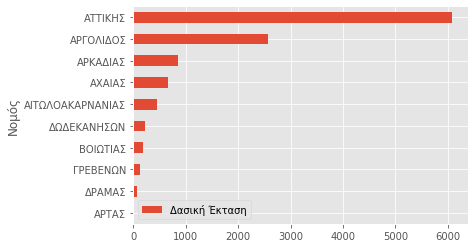

In [311]:
df.groupby('Νομός')['Δασική Έκταση'].sum().dropna().head(10).sort_values(ascending=True).plot(kind = 'barh', legend=True)

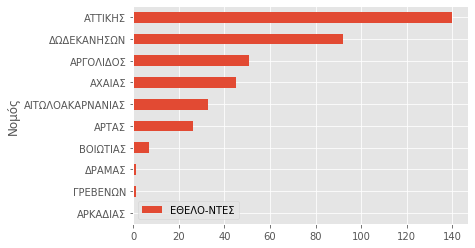

In [310]:
df.groupby('Νομός')['ΕΘΕΛΟ-ΝΤΕΣ'].sum().dropna().head(10).sort_values(ascending=True).plot(kind = 'barh', legend=True)

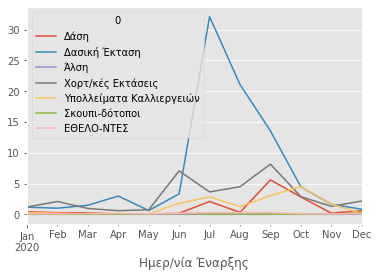

In [318]:
df.resample('M').mean().plot(by='Δάση')

In [320]:
df.set_index('Ώρα Έναρξης' , inplace=True)

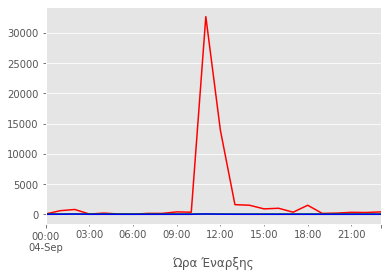

In [328]:
df['Δασική Έκταση'].resample('H').max().plot(color='red')
df['Δασική Έκταση'].resample('H').min().plot(color='green')
df['Δασική Έκταση'].resample('H').mean().plot(color='blue')

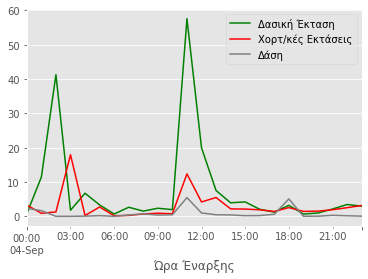

In [334]:
df['Δασική Έκταση'].resample('H').mean().plot(color='green', legend = True )
df['Χορτ/κές Εκτάσεις'].resample('H').mean().plot(color='red', legend = True)
df['Δάση'].resample('H').mean().plot(color='gray', legend = True)
#df['Σκουπι-δότοποι'].resample('H').mean().plot(color='blue')

In [227]:
#df['Ώρα Έναρξης'] = df['Ώρα Έναρξης'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [242]:
df_summer = df[(df['Ημερ/νία Έναρξης'] > '2020-06-01') & (df['Ημερ/νία Έναρξης'] < '2020-09-01')] #pyrkagies to kalokairi 2020

In [243]:
df_summer

0                      Υπηρεσία        Νομός  ... ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ ΠΥΡΟΣ. ΟΧΗΜ.
4681                Π.Υ. ΠΥΡΓΟΥ       ΗΛΕΙΑΣ  ...              0            1
4682        Π.Υ. ΜΥΡΙΝΑΣ ΛΗΜΝΟΥ       ΛΕΣΒΟΥ  ...              0            1
4683            Π.Υ. ΓΙΑΝΝΙΤΣΩΝ       ΠΕΛΛΑΣ  ...              0            1
4684  3ος Π.Σ. (ΒΙ.ΠΕ.) ΛΑΡΙΣΑΣ      ΛΑΡΙΣΑΣ  ...              0            1
4685              Π.Υ. ΚΟΡΙΝΘΟΥ    ΚΟΡΙΝΘΙΑΣ  ...              0            1
...                         ...          ...  ...            ...          ...
7939                Π.Υ. ΔΡΑΜΑΣ       ΔΡΑΜΑΣ  ...              0            1
7940              Π.Υ. ΤΡΙΚΑΛΩΝ     ΤΡΙΚΑΛΩΝ  ...              0            2
7941             Π.Υ. ΠΟΛΥΓΥΡΟΥ   ΧΑΛΚΙΔΙΚΗΣ  ...              0            2
7942             Π.Κ. ΛΗΞΟΥΡΙΟΥ  ΚΕΦΑΛΛΟΝΙΑΣ  ...              0            3
7943              Π.Υ. ΚΟΡΙΝΘΟΥ    ΚΟΡΙΝΘΙΑΣ  ...              0            5

[3263 rows x 21 columns]

In [ ]:
df_summer.dtypes

In [257]:
df_summer[df_summer['Νομός'] == 'ΚΕΦΑΛΛΟΝΙΑΣ'].value_counts()

Υπηρεσία    Νομός        Ημερ/νία Έναρξης  Ώρα Έναρξης          Ημερ/νία Κατασβεσης  Ώρα Κατάσβεσης       Δήμος     Δάση  Δασική Έκταση  Άλση  Χορτ/κές Εκτάσεις  Καλάμια - Βάλτοι  Γεωργικές Εκτάσεις  Υπολλείματα Καλλιεργειών  Σκουπι-δότοποι  ΠΥΡΟΣ. ΣΩΜΑ  ΠΕΖΟΠΟΡΑ ΤΜΗΜΑΤΑ  ΕΘΕΛΟ-ΝΤΕΣ  ΣΤΡΑΤΟΣ  ΑΛΛΕΣ ΔΥΝΑΜΕΙΣ  ΠΥΡΟΣ. ΟΧΗΜ.
Π.Κ. ΣΑΜΗΣ  ΚΕΦΑΛΛΟΝΙΑΣ  2020-08-20        2021-09-04 14:16:00  2020-08-20           2021-09-04 15:21:00  Δ. ΣΑΜΗΣ  0.0   0              0.00  0.5                0.0               0.0                 0.00                      0               4            0                 0           0        0               2               1
                         2020-08-17        2021-09-04 21:38:00  2020-08-18           2021-09-04 09:00:00  Δ. ΣΑΜΗΣ  0.0   0              0.00  0.0                0.0               0.0                 0.02                      0               8            0                 0           0        0               4               1
                     

In [259]:
df_summer.set_index('Ημερ/νία Έναρξης' , inplace=True)

In [ ]:
df_summer['2020-08-31':]

In [270]:
yphresies = df_summer['Υπηρεσία'].value_counts(ascending = False).head(10) #υπηρεσίες με περισσότερη δουλεια το καλοκαίρι

In [271]:
yphresies

Π.Υ. ΚΟΡΙΝΘΟΥ        137
Π.Υ. ΚΑΛΑΜΑΤΑΣ       135
1ος  Π.Σ. ΛΑΡΙΣΑΣ    108
Π.Υ. ΜΥΤΙΛΗΝΗΣ        87
Π.Υ. ΜΕΣΟΛΟΓΓΙΟΥ      78
Π.Υ. ΓΙΑΝΝΙΤΣΩΝ       73
Π.Υ. ΛΕΧΑΙΝΩΝ         70
Π.Υ. ΚΑΡΔΙΤΣΑΣ        59
Π.Υ  ΘΗΒΑΣ            57
Π.Υ. ΚΑΤΕΡΙΝΗΣ        55
Name: Υπηρεσία, dtype: int64

In [273]:
yphresies.to_csv('/content/gdrive/My Drive/Colab Notebooks/yphresies.csv') #save to add to flourish
# flourish link to this visualization = https://public.flourish.studio/visualisation/7180829/ 

In [263]:
#df_summer['Δασική Έκταση'] = df_summer['Δασική Έκταση'].astype(float)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [264]:
df_summer['Δασική Έκταση'].sum()

65112.0

In [ ]:
df_summer.dtypes

In [220]:
#dff = pd.DataFrame({'Nomos': df['Νομός']}, index = df['Ώρα Έναρξης'])

In [ ]:
#df['2021-09-04 14:33:00':'2021-25-04 11:56:00'] #error. can't slice.

In [ ]:
#df['ΕΘΕΛΟ-ΝΤΕΣ'].plot.hist(by='Ημερ/νία Έναρξης', bins= 10)  #tests

In [176]:
#filtered_df = [df.loc[(df['Ώρα Έναρξης'] > '17:00') & (df['Ώρα Έναρξης'] < '9:00')]

In [ ]:
#filtered_df

In [181]:
#newdf = (df['Ώρα Έναρξης'] > '17:00') & (df['Ώρα Έναρξης'] < '9:00')

In [183]:
# = df.loc[newdf]

In [ ]:
#newdf.head(5)